<a href="https://colab.research.google.com/github/DharithriSharma/voiceAssistantForVisuallyBlind/blob/main/Copy_of_project_(1)_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [ ]:
import tensorflow as tf

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from numpy import arange
from tensorflow.keras.regularizers import l2

# Customized Model

In [ ]:
model=Sequential()
conv1=model.add(Conv2D(160,(3,3),input_shape=(64,64,3),activation='relu',padding='same'))
keras.layers.BatchNormalization()
conv1=model.add(Conv2D(224,(3,3),activation='relu',padding='same'))
keras.layers.BatchNormalization()
conv1=model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=259,activation='relu'))
keras.layers.Dropout(0.7)
model.add(Dense(units=323,activation='relu'))
keras.layers.Dropout(0.7)
model.add(Dense(units=355,activation='relu'))
keras.layers.Dropout(0.5)
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
history=model.fit(training_set,steps_per_epoch = 30,epochs = 40, validation_data=test_set)

Epoch 1/40
30/30 [==============================] - 148s 5s/step - loss: 0.7716 - accuracy: 0.6615 - val_loss: 0.4098 - val_accuracy: 0.8313
Epoch 2/40
30/30 [==============================] - 127s 4s/step - loss: 0.4900 - accuracy: 0.7781 - val_loss: 0.3830 - val_accuracy: 0.8484
Epoch 3/40
30/30 [==============================] - 132s 4s/step - loss: 0.4721 - accuracy: 0.7885 - val_loss: 0.3959 - val_accuracy: 0.8575
Epoch 4/40
30/30 [==============================] - 132s 4s/step - loss: 0.4713 - accuracy: 0.7865 - val_loss: 0.3833 - val_accuracy: 0.8480
Epoch 5/40
30/30 [==============================] - 127s 4s/step - loss: 0.4737 - accuracy: 0.7823 - val_loss: 0.4166 - val_accuracy: 0.8209
Epoch 6/40
30/30 [==============================] - 137s 5s/step - loss: 0.4844 - accuracy: 0.7792 - val_loss: 0.3632 - val_accuracy: 0.8512
Epoch 7/40
30/30 [==============================] - 131s 4s/step - loss: 0.4925 - accuracy: 0.7646 - val_loss: 0.4342 - val_accuracy: 0.8329
Epoch 8/40
30

In [ ]:
model.save('model')

INFO:tensorflow:Assets written to: model\assets


INFO:tensorflow:Assets written to: model\assets


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\O_test\O_12970.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 145ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\R_test\R_10584.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 63ms/step
Recyclable


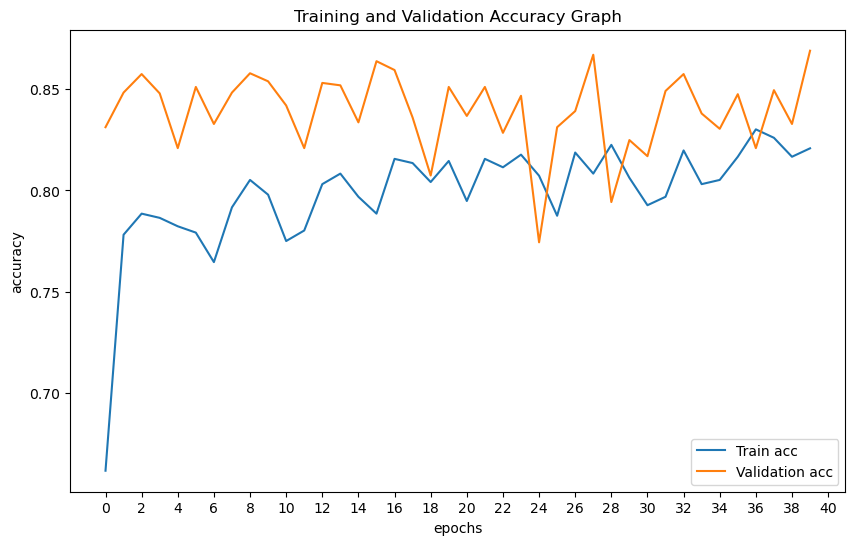

In [ ]:
import matplotlib.pyplot as plt
from numpy import arange
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,41)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 41, 2))
plt.legend()
plt.show()

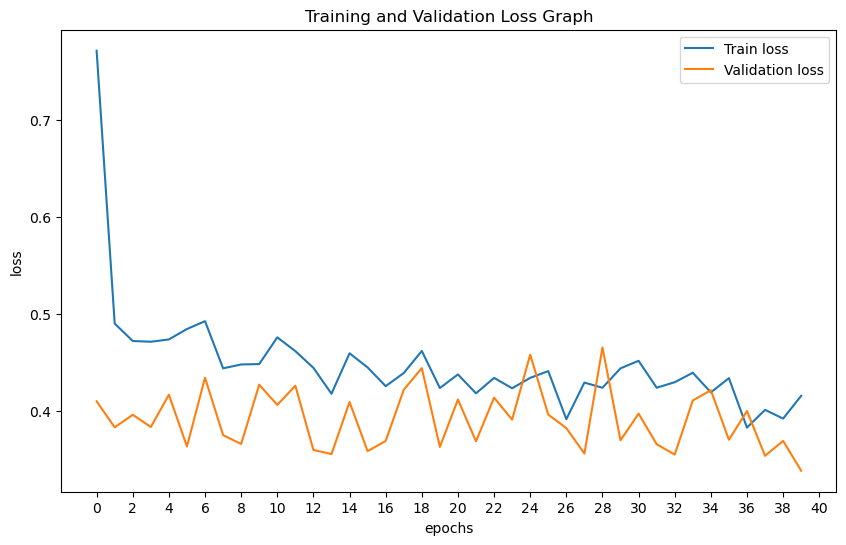

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,41)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 41, 2))
plt.legend()
plt.show()

# Image Classifier using SVM

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, padding = "same",activation = "relu",kernel_size=3, strides = 2,input_shape=(64,64,3)))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 64, padding = "same",activation = "relu",kernel_size=5))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 128, padding = "same",activation = "relu",kernel_size=5))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 256, padding = "same",activation = "relu",kernel_size=5))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Conv2D(filters = 512, padding = "same",activation = "relu",kernel_size=5))
keras.layers.BatchNormalization()
model.add(MaxPooling2D(pool_size=(2,2),strides = 2))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
keras.layers.Dropout(0.4)
model.add(Dense(256,activation="relu"))
keras.layers.Dropout(0.4)
model.add(Dense(512,activation="relu"))
keras.layers.Dropout(0.5)

model.add(Dense(1,kernel_regularizer=l2(0.01),activation = "linear"))

In [ ]:
model.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

In [ ]:
history = model.fit(training_set, steps_per_epoch=30, validation_data = test_set, epochs=20, validation_steps=30)

Epoch 1/20
30/30 [==============================] - 33s 1s/step - loss: 0.9203 - accuracy: 0.5835 - val_loss: 0.5065 - val_accuracy: 0.7552
Epoch 2/20
30/30 [==============================] - 26s 858ms/step - loss: 0.4871 - accuracy: 0.7885 - val_loss: 0.3335 - val_accuracy: 0.8510
Epoch 3/20
30/30 [==============================] - 22s 728ms/step - loss: 0.4819 - accuracy: 0.7865 - val_loss: 0.3467 - val_accuracy: 0.8323
Epoch 4/20
30/30 [==============================] - 20s 674ms/step - loss: 0.4472 - accuracy: 0.7969 - val_loss: 0.2969 - val_accuracy: 0.8677
Epoch 5/20
30/30 [==============================] - 18s 613ms/step - loss: 0.5489 - accuracy: 0.7542 - val_loss: 0.3872 - val_accuracy: 0.8052
Epoch 6/20
30/30 [==============================] - 17s 572ms/step - loss: 0.4422 - accuracy: 0.7990 - val_loss: 0.3529 - val_accuracy: 0.8271
Epoch 7/20
30/30 [==============================] - 16s 543ms/step - loss: 0.5412 - accuracy: 0.7594 - val_loss: 0.5126 - val_accuracy: 0.7719
Ep

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\O_test\O_13216.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 179ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\R_test\R_10972.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 36ms/step
Organic


# AlexNet

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Convolutional Layer 4
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))

# Convolutional Layer 5
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Flatten the previous layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))



In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test',target_size = (64, 64),batch_size = 32,class_mode = 'binary')


Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [ ]:
history=model.fit(training_set,steps_per_epoch = 30 ,epochs = 20, validation_data = test_set )

Epoch 1/20
30/30 [==============================] - 14s 428ms/step - loss: 0.6738 - accuracy: 0.5542 - val_loss: 0.5302 - val_accuracy: 0.8615
Epoch 2/20
30/30 [==============================] - 13s 425ms/step - loss: 0.5973 - accuracy: 0.7125 - val_loss: 0.4937 - val_accuracy: 0.8384
Epoch 3/20
30/30 [==============================] - 13s 429ms/step - loss: 0.5136 - accuracy: 0.7683 - val_loss: 0.3851 - val_accuracy: 0.8532
Epoch 4/20
30/30 [==============================] - 13s 437ms/step - loss: 0.5426 - accuracy: 0.7500 - val_loss: 0.3933 - val_accuracy: 0.8643
Epoch 5/20
30/30 [==============================] - 13s 439ms/step - loss: 0.5142 - accuracy: 0.7604 - val_loss: 0.3895 - val_accuracy: 0.8655
Epoch 6/20
30/30 [==============================] - 13s 432ms/step - loss: 0.5141 - accuracy: 0.7698 - val_loss: 0.4436 - val_accuracy: 0.8635
Epoch 7/20
30/30 [==============================] - 13s 435ms/step - loss: 0.4943 - accuracy: 0.7823 - val_loss: 0.4621 - val_accuracy: 0.8627

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\O_test\O_13216.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 87ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\R_test\R_10408.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 25ms/step
Recyclable


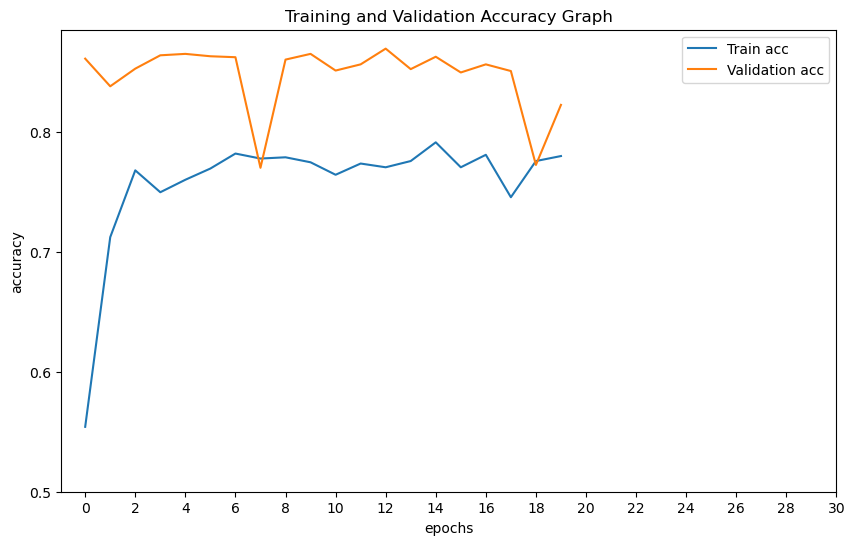

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,31)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 31, 2))
plt.yticks(arange(0.50,0.90,0.10))
plt.legend()
plt.show()

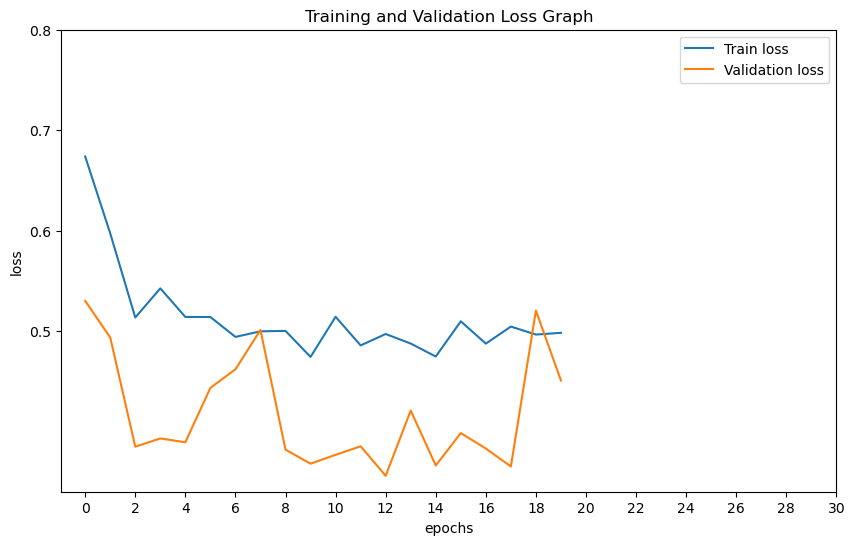

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,31)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 31, 2))
plt.yticks(arange(0.50,0.90,0.10))
plt.legend()
plt.show()

# ResNet50

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Dropout
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(64,64,3),
                   pooling='avg',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dropout(0.6))
resnet_model.add(Dense(1, activation='sigmoid'))

In [ ]:
resnet_model.compile(optimizer='adadelta',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [ ]:
epochs=20
history = resnet_model.fit(
  training_set,steps_per_epoch = 40,
  validation_data=test_set,
  epochs=epochs
)



Epoch 1/20
40/40 [==============================] - 25s 562ms/step - loss: 0.7807 - accuracy: 0.4750 - val_loss: 0.6894 - val_accuracy: 0.5535
Epoch 2/20
40/40 [==============================] - 21s 546ms/step - loss: 0.7278 - accuracy: 0.5031 - val_loss: 0.6894 - val_accuracy: 0.5555
Epoch 3/20
40/40 [==============================] - 22s 562ms/step - loss: 0.7501 - accuracy: 0.5063 - val_loss: 0.6894 - val_accuracy: 0.5579
Epoch 4/20
40/40 [==============================] - 22s 562ms/step - loss: 0.7202 - accuracy: 0.5344 - val_loss: 0.6894 - val_accuracy: 0.5583
Epoch 5/20
40/40 [==============================] - 22s 558ms/step - loss: 0.7646 - accuracy: 0.4563 - val_loss: 0.6897 - val_accuracy: 0.5663
Epoch 6/20
40/40 [==============================] - 22s 553ms/step - loss: 0.7429 - accuracy: 0.5000 - val_loss: 0.6896 - val_accuracy: 0.5607
Epoch 7/20
40/40 [==============================] - 22s 569ms/step - loss: 0.7498 - accuracy: 0.5000 - val_loss: 0.6893 - val_accuracy: 0.5603

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\O_test\O_13968.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 23ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\R_test\R_10002.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 20ms/step
Recyclable


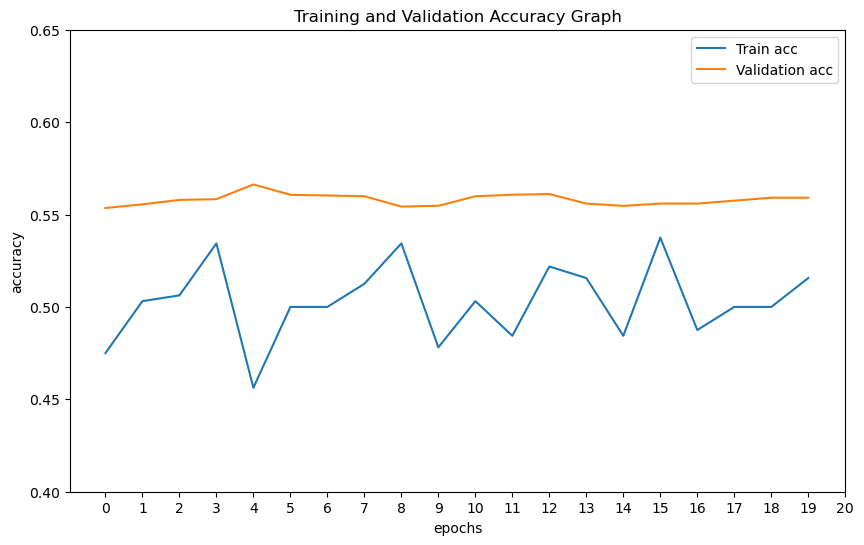

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 21, 1))
plt.yticks(arange(0.40,0.70,0.05))
plt.legend()
plt.show()

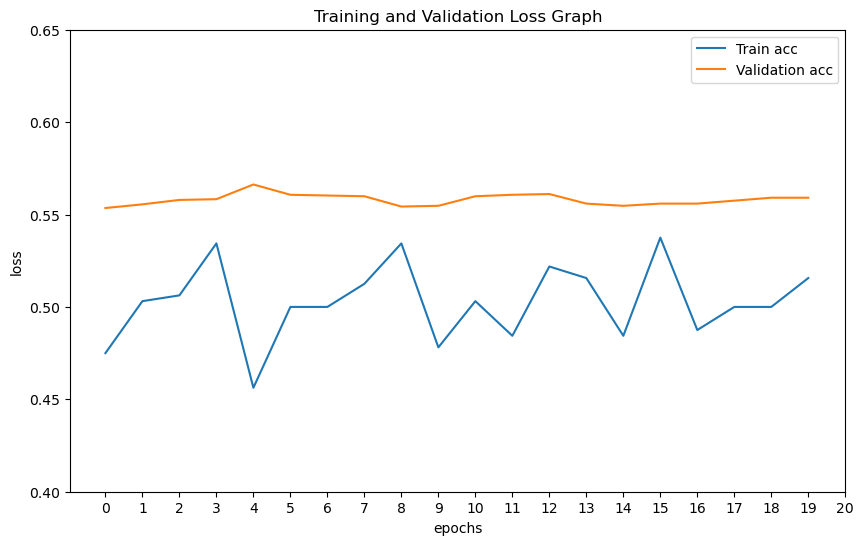

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 21, 1))
plt.yticks(arange(0.40,0.70,0.05))
plt.legend()
plt.show()

# VGG-Net16

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

In [ ]:
# Create the model architecture
from tensorflow import keras
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
keras.layers.Dropout(0.6)
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
history=model.fit(training_set,steps_per_epoch = 20 ,epochs = 40, validation_data = test_set )

Epoch 1/40
20/20 [==============================] - 28s 1s/step - loss: 0.7632 - accuracy: 0.6187 - val_loss: 0.4905 - val_accuracy: 0.7704
Epoch 2/40
20/20 [==============================] - 27s 1s/step - loss: 0.4668 - accuracy: 0.7688 - val_loss: 0.4811 - val_accuracy: 0.7891
Epoch 3/40
20/20 [==============================] - 26s 1s/step - loss: 0.5080 - accuracy: 0.7875 - val_loss: 0.4880 - val_accuracy: 0.8221
Epoch 4/40
20/20 [==============================] - 25s 1s/step - loss: 0.4436 - accuracy: 0.7812 - val_loss: 0.4721 - val_accuracy: 0.8150
Epoch 5/40
20/20 [==============================] - 25s 1s/step - loss: 0.4141 - accuracy: 0.8000 - val_loss: 0.4369 - val_accuracy: 0.8368
Epoch 6/40
20/20 [==============================] - 25s 1s/step - loss: 0.4314 - accuracy: 0.8188 - val_loss: 0.4679 - val_accuracy: 0.8265
Epoch 7/40
20/20 [==============================] - 27s 1s/step - loss: 0.5262 - accuracy: 0.7375 - val_loss: 0.3935 - val_accuracy: 0.8480
Epoch 8/40
20/20 [==

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\O_test\O_13968.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 164ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\R_test\R_10002.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 37ms/step
Recyclable


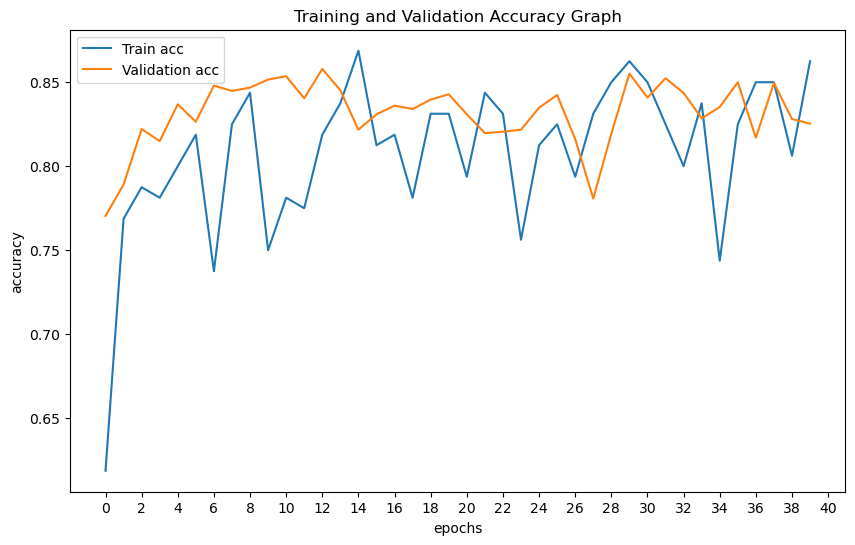

In [ ]:
from numpy import arange
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,41)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 41, 2))
plt.legend()
plt.show()

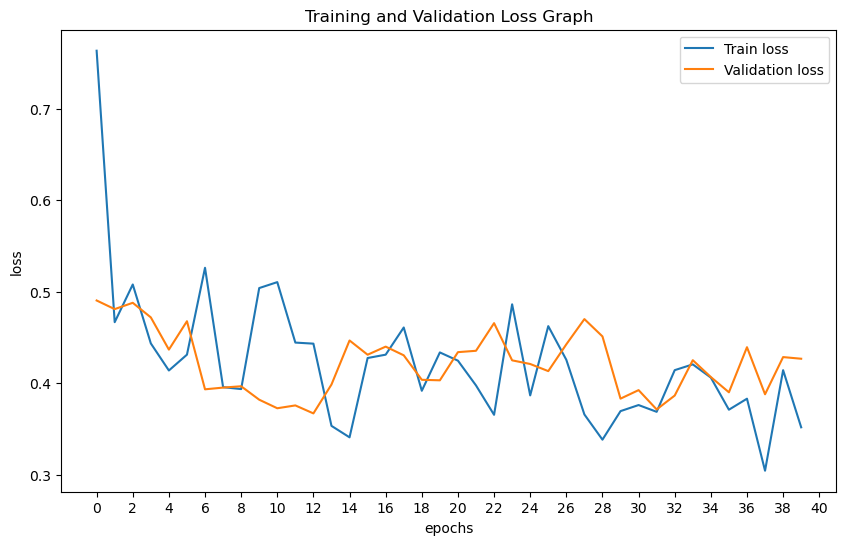

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,41)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 41, 2))
plt.legend()
plt.show()

# VGG19

In [ ]:
vgg19_model=tf.keras.applications.VGG19(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=None,
    classifier_activation=None,
)

80134624/80134624 [==============================] - 8s 0us/step


In [ ]:
from tensorflow import keras
model=Sequential()
model.add(vgg19_model)
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
keras.layers.Dropout(0.6)
model.add(Dense(units=1,activation='sigmoid'))


In [ ]:
for layer in vgg19_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('train',target_size = (64, 64),batch_size = 8,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test',target_size = (64, 64),batch_size = 8,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
history=model.fit(training_set,steps_per_epoch = 40,epochs = 20, validation_data=test_set)

Epoch 1/20
40/40 [==============================] - 32s 791ms/step - loss: 0.7067 - accuracy: 0.6469 - val_loss: 0.4447 - val_accuracy: 0.8345
Epoch 2/20
40/40 [==============================] - 33s 847ms/step - loss: 0.4569 - accuracy: 0.8000 - val_loss: 0.4205 - val_accuracy: 0.8368
Epoch 3/20
40/40 [==============================] - 34s 860ms/step - loss: 0.4839 - accuracy: 0.7656 - val_loss: 0.3978 - val_accuracy: 0.8496
Epoch 4/20
40/40 [==============================] - 33s 850ms/step - loss: 0.4542 - accuracy: 0.7812 - val_loss: 0.4345 - val_accuracy: 0.8197
Epoch 5/20
40/40 [==============================] - 33s 847ms/step - loss: 0.4987 - accuracy: 0.7469 - val_loss: 0.4183 - val_accuracy: 0.8388
Epoch 6/20
40/40 [==============================] - 35s 893ms/step - loss: 0.4884 - accuracy: 0.7688 - val_loss: 0.4436 - val_accuracy: 0.8221
Epoch 7/20
40/40 [==============================] - 36s 917ms/step - loss: 0.4430 - accuracy: 0.8031 - val_loss: 0.4310 - val_accuracy: 0.8321

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\O_test\O_13968.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 175ms/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test\R_test\R_10002.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 37ms/step
Recyclable


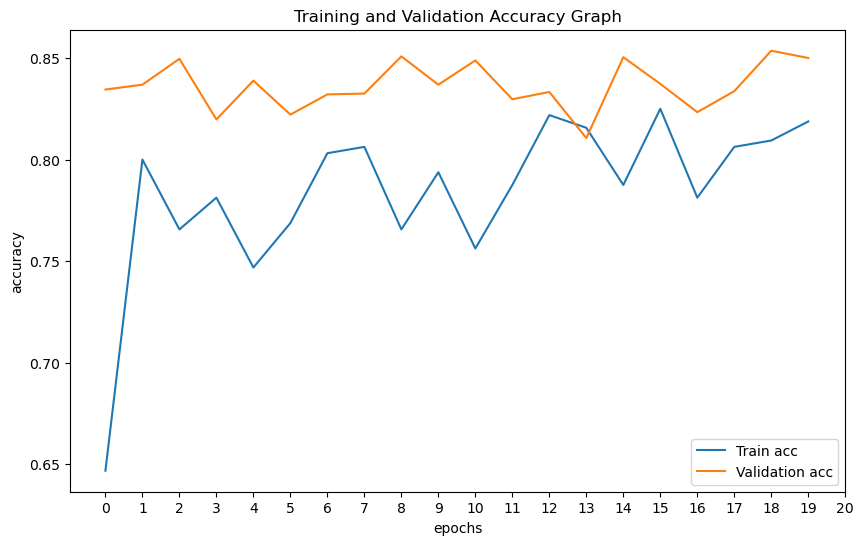

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 21, 1))
plt.legend()
plt.show()

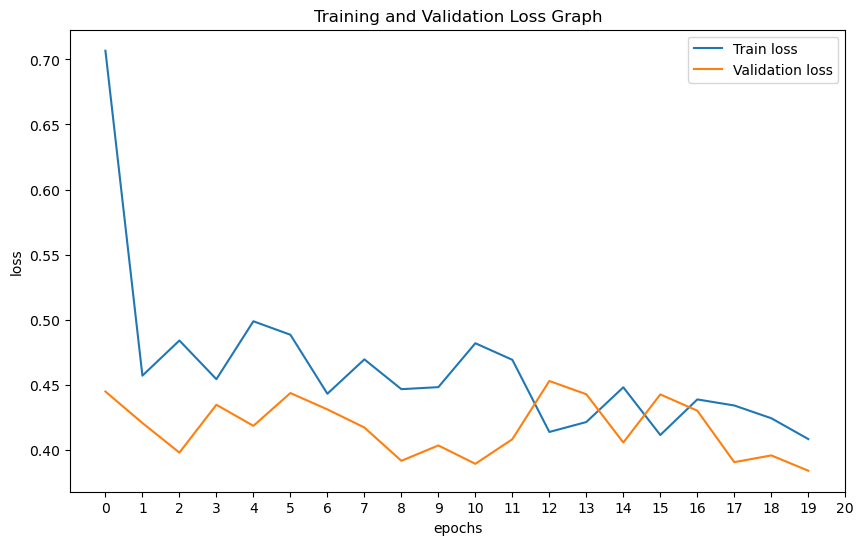

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 21, 1))
plt.legend()
plt.show()

# EfficientNetV2B3

In [ ]:
efficientnetV2_model=tf.keras.applications.EfficientNetV2B3(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=None,
    classifier_activation=None,

)

52606240/52606240 [==============================] - 13s 0us/step


In [ ]:
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(efficientnetV2_model)
model.add(Flatten())
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=32,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
for layer in efficientnetV2_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
history=model.fit(training_set,steps_per_epoch = 20 ,epochs = 30 , validation_data=test_set,validation_steps=20)

Epoch 1/30
20/20 [==============================] - 18s 530ms/step - loss: 0.7128 - accuracy: 0.5219 - val_loss: 0.8062 - val_accuracy: 0.4484
Epoch 2/30
20/20 [==============================] - 8s 396ms/step - loss: 0.7089 - accuracy: 0.4953 - val_loss: 0.6953 - val_accuracy: 0.4125
Epoch 3/30
20/20 [==============================] - 8s 425ms/step - loss: 0.7665 - accuracy: 0.4984 - val_loss: 0.6906 - val_accuracy: 0.5625
Epoch 4/30
20/20 [==============================] - 8s 399ms/step - loss: 0.6996 - accuracy: 0.5125 - val_loss: 0.6861 - val_accuracy: 0.5625
Epoch 5/30
20/20 [==============================] - 8s 421ms/step - loss: 0.7111 - accuracy: 0.4828 - val_loss: 0.7467 - val_accuracy: 0.4344
Epoch 6/30
20/20 [==============================] - 8s 398ms/step - loss: 0.7138 - accuracy: 0.4578 - val_loss: 0.7206 - val_accuracy: 0.4266
Epoch 7/30
20/20 [==============================] - 8s 421ms/step - loss: 0.6982 - accuracy: 0.4812 - val_loss: 0.7023 - val_accuracy: 0.4578
Epoch

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\O_test\O_12609.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 2s 2s/step
Organic


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\R_test\R_10002.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 47ms/step
Organic


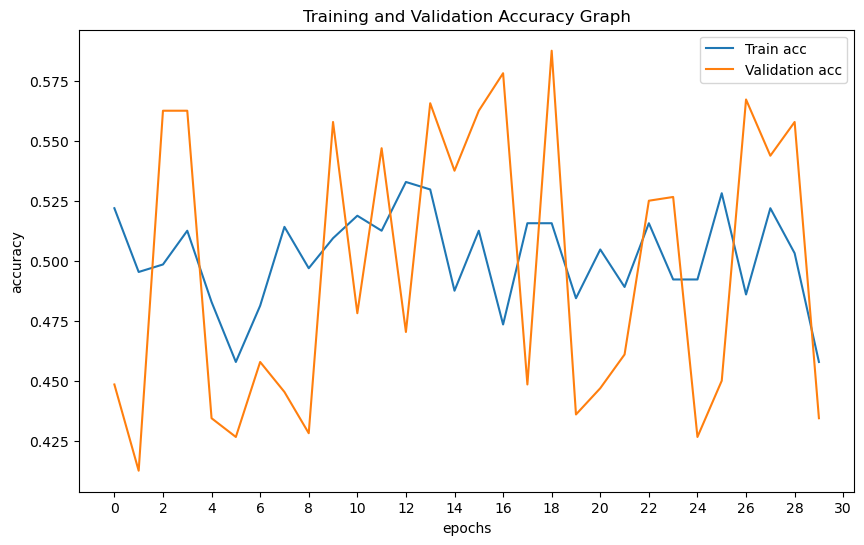

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,31)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 31, 2))
plt.legend()
plt.show()

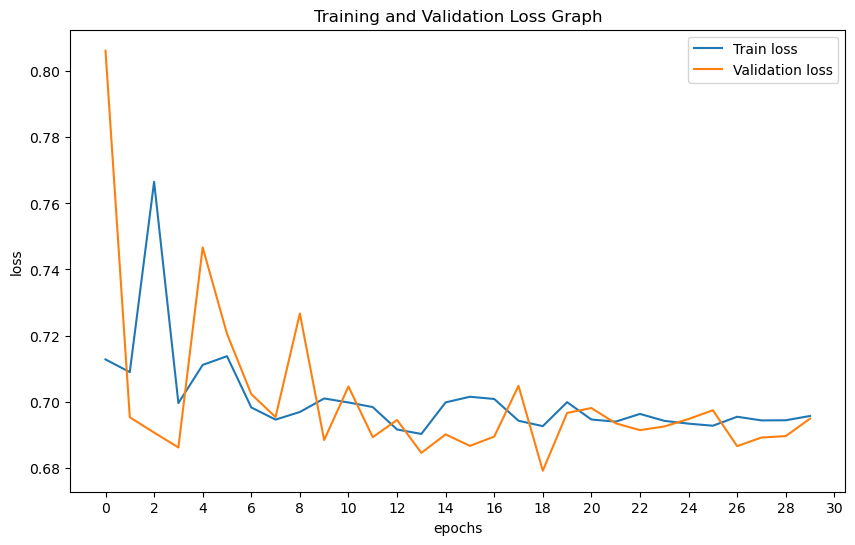

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,31)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 31, 2))
plt.legend()
plt.show()

# DenseNet

In [ ]:
densenet_model=tf.keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(64,64,3),
    pooling=None,
    classes=None,
    classifier_activation=None,
)

In [ ]:
from tensorflow.keras.layers import Dropout
model=Sequential()
model.add(densenet_model)
model.add(Flatten())
model.add(Dense(units=156,activation='relu'))
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

In [ ]:
for layer in densenet_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.4,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set =train_datagen.flow_from_directory('123train',target_size = (64, 64),batch_size = 32,class_mode = 'binary')
test_set = test_datagen.flow_from_directory('test1',target_size = (64, 64),batch_size = 32,class_mode = 'binary')

Found 19998 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
type(training_set)

keras.preprocessing.image.DirectoryIterator

In [ ]:
history=model.fit(training_set,steps_per_epoch = 100 ,epochs = 10, validation_data=test_set, validation_steps= 50)

Epoch 1/10
100/100 [==============================] - 54s 483ms/step - loss: 0.4394 - accuracy: 0.8178 - val_loss: 0.3221 - val_accuracy: 0.8769
Epoch 2/10
100/100 [==============================] - 50s 504ms/step - loss: 0.3422 - accuracy: 0.8531 - val_loss: 0.3110 - val_accuracy: 0.8744
Epoch 3/10
100/100 [==============================] - 48s 479ms/step - loss: 0.3257 - accuracy: 0.8609 - val_loss: 0.2890 - val_accuracy: 0.8806
Epoch 4/10
100/100 [==============================] - 50s 499ms/step - loss: 0.3158 - accuracy: 0.8709 - val_loss: 0.2913 - val_accuracy: 0.8906
Epoch 5/10
100/100 [==============================] - 51s 510ms/step - loss: 0.3252 - accuracy: 0.8597 - val_loss: 0.2804 - val_accuracy: 0.8969
Epoch 6/10
100/100 [==============================] - 43s 435ms/step - loss: 0.2855 - accuracy: 0.8816 - val_loss: 0.2661 - val_accuracy: 0.8931
Epoch 7/10
100/100 [==============================] - 43s 435ms/step - loss: 0.2875 - accuracy: 0.8806 - val_loss: 0.2898 - val_ac

In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\O_test\O_12609.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 1s 1s/step
Recyclable


In [ ]:
import numpy as np
from keras.preprocessing import image
import keras.utils as image
test_image =image.load_img('test1\R_test\R_10002.jpg',target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Recyclable'
else:
  prediction = 'Organic'
print(prediction)

1/1 [==============================] - 0s 50ms/step
Organic


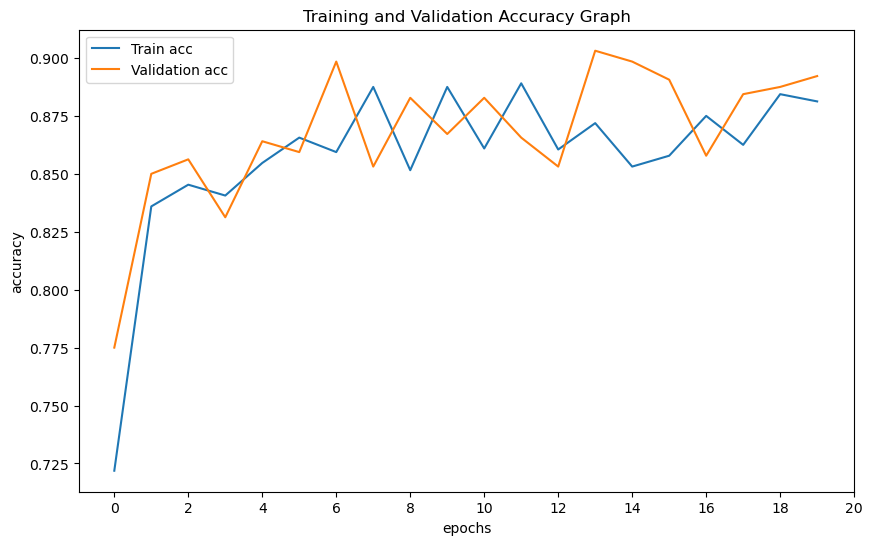

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Training and Validation Accuracy Graph')
plt.xticks(arange(0, 21, 2))
plt.legend()
plt.show()

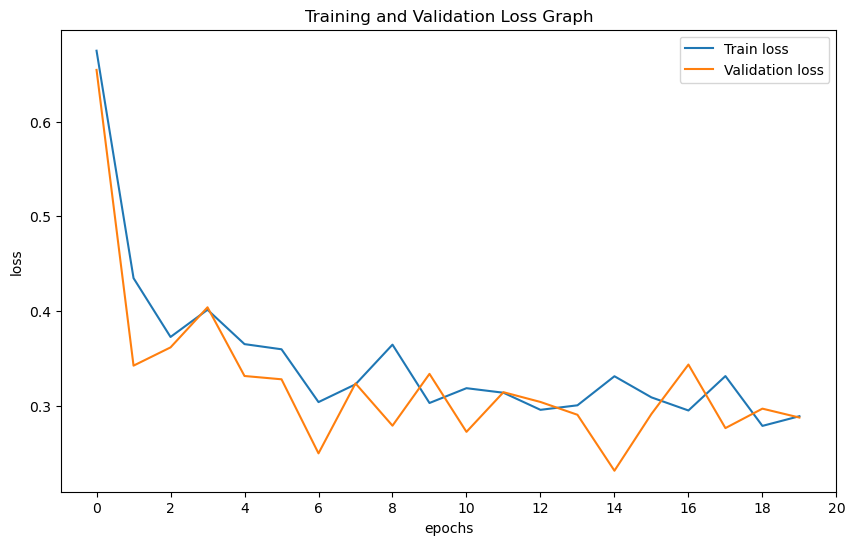

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,6])
plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation loss")
epochs=range(1,21)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Training and Validation Loss Graph')
plt.xticks(arange(0, 21, 2))
plt.legend()
plt.show()

# Explainable AI-LIME Method

In [ ]:
pip install lime


  Using cached lime-0.2.0.1.tar.gz (275 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283846 sha256=427127e6ad8b0d21eb350888456d8bad775023f0f9f28ffea30264b41d910f35
  Stored in directory: c:\users\aditi\appdata\local\pip\cache\wheels\ac\fc\ba\bc2e218408e730b7ad32dc45fbaa1ae6f0ab314e581101bdff
Successfully built lime


In [ ]:
import numpy as np
from skimage.segmentation import mark_boundaries
from lime import lime_image
from PIL import Image

In [ ]:
model=tf.keras.models.load_model('model')

In [ ]:
image = Image.open('123train\R_train\R_27.jpg')
image = np.array(image)

In [ ]:
def predict_fn(images):
    predictions = model.predict(images)
    return predictions

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image, predict_fn, top_labels=1, num_samples=1000)
label = np.argmax(explanation.top_labels)
lime_image, mask = explanation.get_image_and_mask(label, positive_only=False, hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 135ms/step


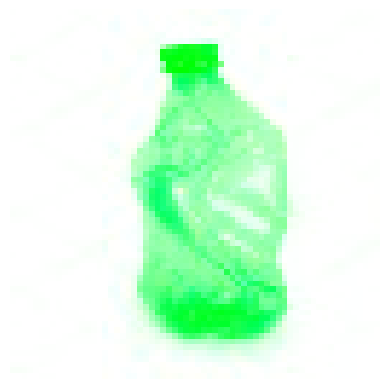

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mark_boundaries(lime_image, mask))
plt.axis('off')
plt.show()

In [ ]:
image = Image.open('123train\O_train\O_3586.jpg')
image = np.array(image)

In [ ]:
def predict_fn(images):
    predictions = model.predict(images)
    return predictions

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(image, predict_fn, top_labels=1, num_samples=1000)
label = np.argmax(explanation.top_labels)
lime_image, mask = explanation.get_image_and_mask(label, positive_only=False, hide_rest=False)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 146ms/step


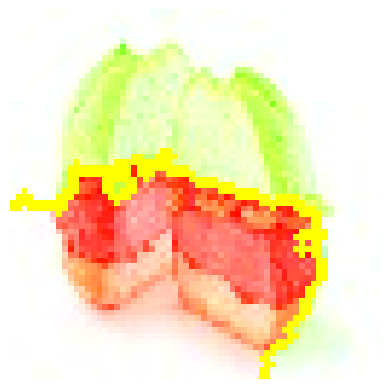

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(mark_boundaries(lime_image, mask))
plt.axis('off')
plt.show()

# Explainable AI-SHAP

In [ ]:
pip install shap

     -------------------------------------- 435.6/435.6 kB 3.0 MB/s eta 0:00:00
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tf_keras_vis

ModuleNotFoundError: No module named 'tf_keras_vis'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from IPython.display import Image

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import vgg16
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
from PIL import Image
from tensorflow.keras.preprocessing import image

In [ ]:
img_size = (296, 166, 3)

In [ ]:
model = vgg16.VGG16(weights="imagenet")


In [ ]:
''''image = Image.open('image_thumbnail.jpg')
new_image = image.resize((299, 299))
new_image.save('Garbage2.jpg')
print(new_image)''''

SyntaxError: EOL while scanning string literal (1786325719.py, line 4)

In [ ]:
image = Image.open('d/waste.jpg')
new_image = image.resize((224, 224))
new_image.save('WASTE.jpg')

In [ ]:
print(new_image.size)

(224, 224)


In [ ]:
img = tf.expand_dims(new_image, axis=0)

In [ ]:
print(img)

tf.Tensor(
[[[[124 159 189]
   [128 163 193]
   [122 157 187]
   ...
   [ 66  65  45]
   [ 57  56  35]
   [ 54  53  32]]

  [[122 157 187]
   [127 161 192]
   [124 160 190]
   ...
   [ 68  66  47]
   [ 73  72  51]
   [ 71  70  49]]

  [[129 164 194]
   [127 163 192]
   [124 161 190]
   ...
   [ 59  59  40]
   [ 64  64  44]
   [ 63  63  42]]

  ...

  [[133 141 133]
   [136 149 139]
   [145 165 152]
   ...
   [ 76  61  55]
   [ 71  56  48]
   [171 157 148]]

  [[137 140 133]
   [142 148 140]
   [159 173 161]
   ...
   [ 75  60  55]
   [107  93  85]
   [211 197 188]]

  [[147 148 142]
   [130 135 128]
   [159 170 159]
   ...
   [ 98  83  78]
   [151 137 129]
   [237 223 214]]]], shape=(1, 224, 224, 3), dtype=uint8)


In [ ]:
img = Image.open("waste.jpg")
img_path = keras.utils.get_file("waste.jpg", "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBwgHBgkIBwgKCgkLDRYPDQwMDRsUFRAWIB0iIiAdHx8kKDQsJCYxJx8fLT0tMTU3Ojo6Iys/RD84QzQ5OjcBCgoKDQwNGg8PGjclHyU3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3Nzc3N//AABEIAKYBKAMBIgACEQEDEQH/xAAbAAACAgMBAAAAAAAAAAAAAAAFBgMEAAIHAf/EAEQQAAIBAgQEBAMGBAQEBAcAAAECAwQRAAUSIQYTMUEiUWFxFIGRFSMyQqGxUsHR8AdiouEWM3KSJENT8RclNGNzgrL/xAAZAQADAQEBAAAAAAAAAAAAAAABAgMABAX/xAAqEQACAgICAQQBAwUBAAAAAAABAgARAyESMUEEEyJRYQUygRRxsdHxkf/aAAwDAQACEQMRAD8AICVHTW/K/wAv5l+uPOZ/6L/9q/74GSZTQCZVOzL2Z2+uxBvjWfJcrm0v8KsrL+UyNf8AcX9zfHbzPicXt/cIDM41fQ1bErf/AJVX9OuNXShn3mkSb1Mmr9zinBw/lMoI+y1Tw9n/AN74ry8IZQnj+FeNRsDcfzvhC5/EYYx+YYjFIih6eIslwdMctlNvQHScRyZrSxMY5IqmML1HKJt38v64DDh2kp5L01fXQMP4VLX97W2xZjy3Mdepc7ndT+VoQn8j+2FDnwISn3LsWca42lgoKieEfnhW4+jWxrT8TUE6uVkqIwNhzKZ7KR8rYrDKq2TWKmVQj7t4zv26ADElLk0ay6PjZFjYW5YBQH5k/wAsbk01CW5uIqNADzWkuOgH4ff+uN4sw+Oh51JWKUA3YLYE/MbH3xrJw/TVGkSTTOALAO+oC3vtiovDWWQOdKFZ0N9UQ8Snz8I2wbP4g3MpquaYWirIpJixugMRt6jSN/niyZq+NSZqnlKB+IRBh+jbfTAyXhKGSYsuYM7tvd1YkHzsW/lj1OEBCQyVQ/ykRt4fmGvjWfqCStXtKxjOcREnbwQG/wDPAuSmqBMY5M2rpY3/ADQQyXT0BBt8/wBMMEeXVMUSpDmWwJuSrMf1YWxEcvqS5K5xWk91QWH6n+eMbMFQTRR0aMRJV8RyMO7c236LieprEhH3WZ5xEB/6lMrj/UL4IxStA1qmuqJdPYQrf63OJfjIhb/wszKwJWQ0ZbfyIAxotRaqOIaylkS2Y/ED8wkpxGbfI/zxrlnFjR5rJUVjPLDIoVQiKuj5d/8Au+uG5pIamIq0DkG20kaoD62Y4q1OWwqhFPltIQBcao47X9Lb/rjb+4pUjoyWiz6gqSzOrqC34lkjYN8iRb9ce1mc0NO7NQSwyEC5jldo2B9NKkfpiitJRVGqOfI5V3BUrGSreZsvTfFvLDHRoYIKeaJQDy3WjKMB5EkeL9MYwgmUE4lq0YzVOTbNuGp51Yn3HVve2LMXEtQx2ySq0N0IcavmDgjDVNEl6mcj1bQgA9Re+E/ic0M9Vrps116vxRrO7afmSbD54m78BqWRSezC1Vn2YJUHRHUUwIH3XLF2+ej+ZxRq67L6oWrMrlknbb72rlZVPmU2/TAinorpZ6qPcCwqE1qfne2PJcgEil43o5JIxcoJhc+wvsMc5yEyvECXZeH5Z1MlOtJAoN1eKnkQt82DEDBCsyuSqyuGOV6YTaVBmc7Da2zAXAPXt7YCUOV1dHKJEyhHcpfwOGK+4AOJamqziEm9aYNQ8KmKYaf9NsIHHmNQmkmSVNMeVBJSvqNiyI0gax89Ox3xuMozOmJmhmhSfWAoEW4ttezKd998VZ8yzKVrTZvS1Fhb72IH5Albj5WGK/2lmEC3hro1jHWOJtNz06Dr16+mGBWaiZYzDLc3lnY1aUfOcBpDZkvsLXA2+gB2xQqsseGlaoepij/yeI3PoLYnlrK27XrY/wDp+Hjb6ErgVUGWR9c04kN/4bW+Q2wCQYwFQtluWtUUEjvNSrMPwl54+nqt7/LAp5ZKctGFhYXtqWIgH9v2xu/4V5FU0e245ht9AcWoKOjmZb1NTI1vEApP9cAwyTLcoSpUSACdF6xxzFCPT8JxPE1FTVDoY6RX3UmaqclL7abcsXOIqLLFklPK5EsiG6pNGULfoP3xYzCKtqGKyZXEzILloIj4fnrN/mMEVB5lEy2hMMVVSsikjR96HHtdlGKokAZWp5UBKWLfCjWR3ufFb3B/3Kx0mXyUjQy0NTGV6yPpU/XEBqlobCkaV4r7EtfSR5G1saxNBxndAFVmJ/MSt7n2JNtrf3tjMWBWHnk2nWRjcNG2lie52HtjMKahudupcuzyqZo81pqPR+WRZNQ+Yt+o+mI6rhyczOq090845dI/rhkTMaV/BzYvw+TDGfaVHr0c2MMdtywx2jUQ2YlVOWLQyxQ1Mjwuw1Rq7D57jrirOk4f7uSIodvxkf1wQ4qzKGqz6nSKQTRhOWdCghWsbi/bAOuNNBERzOWw3Ave+C2RVXkxoQLjLtxA3LbwxtIGmiDKFtudsDlyyhjdpUlnVb28M7Lp/v3xFS8+Zi1HUEg7uG6k/wAsReEyWziEv4trG/tthAyZBYFxijYzxujLslDEZ0aHOKuMyjSqCS42374J0ysqtzqtp1tbU/Qe22B8CZcrLJSqFANwdRBB/wDY4G59xOuUtYya5PyxqQScYcAdQsuStmME6OrKyMCLjUOuAVWMwWuURVNLzFvpuzhlHl1ub+W464C0XHUstQBNl2pHNgY3LN9Da+GZ6+WorIIp6QeM3bVFfSp7k4J4nzF+Y8CRrV5uzjXBKwAtaBrAeu4GN2qK8RyA0eY6iDYBlAY+/XDdRVeUQ10OWUxqIZagHU8kRAJHQ3I26EW9cNDUUTBebGjWFvEg3xynN8qFywxasgTlEOt0j+Ny+rWW3iLVJAv/AN2J4aWjlYa6WZLDqJC38zjoyRZW8xiSmiEg6+DEs+TUFdAYpIRGR0aO6/th1z2auI2GhdCc6+Ey8nQIZN+51H574lShpQpjhpodHqLk4Y5OEZ43YRSxOOguxuMV4ZPsCvMFTSxyNIuoSKRZf6HFwy/cjwP1A44cpJvHHQKSOpWlvj2HLqimcQiGMR/w8ggk+dsOUGbNPGSYluB3bF/L8xdwb2db9R+XfAuN7Q+oiVSzRsqS/dk92bSflcYrqaeCqdpGkcm50u5ZB22Py88dBzAU9ZNA00AdV1KeYL+W+LdY9FTpEshgjXppIG+MWMwQTkGb5pQorq0TSqw2Xkkrhc+KoZQ6rRQQlgQCyGwP6fpjq/FWTUuZRLPl7Qx1CXsy7X8gbYS4MuWntU1Vay0yyFTGpDs3exBBt73xF7JjjGK7gfLMozWeGSWmiOy/iUKYj8ybg4pLX1SyWqERyht+G+/zvh0qM2opV0u1UoU2jjTwoB64F5/HloamIpRKpjuWjXdT5kDc4nkxmtGFU33A9P8AF1ZZoLIE68tdG3yxq088QISpBI9f64nNRBrhWnoo07C6tf8A2xFWTM8UkVPFSxLfSys258+uOf2r7lfaPgwfmPxzWaOYEEb2sf2wEnNRpIlUm3fThpWGN4QJFKmwA5Ta16Dv2xXejkVCrS2Q9dRuLfPFQCsQ4jFxZR4QyjpvcDFmmrxErLIGZewABH74JPlCWHOqKc3F1OrTcYrzZQYlEtgYb2Da7hvng3cBQjxKctVC5uaVG+dv2xGxga1oQh67McXaimijT/krcjrfriAqsS35Ta1FgSLlR39xg1BuR/FSBCqzuVYbq+4xpHWyxALFPIlv4XIwyrTR/AwPXQKjsQBpivcefpizSZFl9XJy7QxSgakDvsf9sK1ILMB0IoSVLTNeZ3cje7sTj2KfSSYzZjvcDfHQYv8AD+CWnu0gSQtfmA3A9Dj1P8OZkN4ZoWINzudsTRw/UQODEX42oqFAklL9twLj54zDNV5G9FE5qqbmlFN5IiLW+WMwOanzHDA+YTyhc0oF+G5xYv4tTXZi1t/YG2DMlZXCnMOYxuynfmC6W+fbDJl+YUVaF+z5oI1H5FsPri/MI+WBUyIAO7gEEdwR8sekLqbzOYpn9Jl0zJVVCOWNwYk3X/qt38zjWRKvO1+MWilZf/KKkC47388NtZlnDlPI1aKGkibuxUdfO3ngFnHFtJRQlKKIzyWIRAQADfEMqs4omhL4WCWwFmBstqZcnrK0V8oWZmAWJD5Dzxbg4tp6VpRT0sbVLiwkkXUR57Hp1wBos4LhmqGUTSfj5J1kb332xfoGilqkhOWTOjklpLHwj3xAq4WuWhLckLciu/uA81zeoKukL2Ja5sNhhkynhyhrKSPMcwpog8yXDTyXJ9h22xen4Riqo2kp8rCMvR5Htv574ifJJTSiJsyiHJ3EQBfQPTy74fAgA5RM2fmQssUyUGX6WgejjK7hViu392xNClRWz6qaWs13uEjgsvvc4ucOSR5eE1CmruYwDvbxKLW8um364Z562JRzYJlTSzWUbA36n6bYDepwqaLCZcbkaWQiOFoWVYEDFRrd92J87+eDGU19RNTxRV8TRTqLCQnaQW63wgz8Qx/EFWc6WuCPngrTZzFXUxgqqurip0QqVjitt56sHTdQE8e47StClnkkjVvMEbjFerzOmij1SVJUEbWUk/pihleXZfTxK9HQyysNtc9yf9WL4nrHmEHKEUY7gA/TA9mL7kGZlmFTHT6aaZFLHd5TbSPYYVabJ6mrNTPV50C8p0MqjZOtiPTfD3XcPZdXxOlYsra/EXZyCCPbphNzCgyVKeWloq6R9RO7x33H+YHzxRVGMxuS5ErzNOD8uimmliFbNUrFdJHkc6NQ8vM264MZvl9bS07Pl9e8SMNIQJsD8sBqOZqDLIYoKN7R38cJ1EtipNxJX1LxoavRKHH3cSX1HV4QT9L4oxSu5MK0qZbUVcLTwZhV5hmFSkSvZnCRgHsbAeL0xFQZpn1Zmwd6SR9EV4RK1tFj3PrsMMuX5NFNmLTVFYZTq1VFE5Fi1vzW8uuLmZ5atXSyQ0OSiN2NuY7aLeVrHCC/uGxKjVy0czjMKmIVErBlQjwjpte1/XG09PllY+g1MRVx4mpt2B7YWazhXNKekgmzSoMrRatEbvrUncAMR2tbA6LK4hQpDRGjpJ0XZopSC59TjKT5mYX1HZuGaOWnV6SrMs6jddVibeXlherMlo6iWRilSjxNyyTcknywIyfJOI6mU00db8OqeJ9U+onyt5j54bqXhqshKPJmUkrMPvERrL8798NQMnVReHDTuic6U05vcF5LsR5YCzZIKepm0UhkKatTSOTqPsN++OmrkFIJFZqydregwey3Jo8spnNPDHVSudTO4s58sAosxM4jPl4odkgaOR9/E+gA+w64oNFU6jZySdjjr/EVK+cxvTVQFJMh+7bSA49vPClJwatO7jMa2YAAcsxJe5tbc+XTCtiY9Cbnx8xX+16+Kn5KSxgDwqZIh0/lgNIlQWJfSSTuQNhfe4w/wcEyO7uagSQ9NUQ3+noLX98SDhzLaCBp66CoeNTbSTYnyNsAY6UmoS5LAE9zn/LlCahVHY9r7Y2kmnEYN7eGxdbgsfXHSKOPIbhqXK4GO3ikOKU1I3xZSB6ZIpLkJywxB9MRfOqToT0zPE+kE3JQ0ck/N6EadSnbBKhy6uNMJRDILH8ckYUg+XthjMa0sKtPXuHFyFgpzYfpgNPUQ1kkhlmzaaKRwg+5IX/fCLmd+l1GOBFPyMyLKM0ls71wjFu1QV1jt3wXj+0qal+H+0opXXcHW0hA87j6Ygy7I4HKz/Z1eoS2mSoZVU26C2GNKHPa6nngo6OFYz4RIzhCOnYYIxNk/f8A4knTEPFzn9VJFJXS0ldWs8q2tqRgGHsOmPcN8/AVZK3NnqaaGqk/EQhN7euPcP7JHRhDoBpREikizOOVhBQzltWpOfOEv7Ab4b8uynMqyQLmGdCIL+JYBflk9V1G9/0tgLLT0EWY86grZqo6d9Uh1SNfawa+w/XBHK5qujlMNeKh4b/cyRwMpAO+9uu5tfHSjqBbSeRMhI49eYczHJcheE0NSwYHcPzW5oPvhafgOmmgElPmMXIiBOmcBiBf9DhkhnyYza6h4bgi/Max/XEfwtDLNK8lRClNIfAqNcr62G31+mLLTD4i5zvaG2ahKFHwtk8OXh5qpi5HiaBQbewwYyullQxxwzvDl4sdcqhTbyHniegpsppqf4lInvqtGZTsfW2wxb1Uk6fFVtUPhwfwA2+uA6Be4Vct11MlozmBBpi7QBvGzyEBvbzxvR5blFHLoBhjJc8xS5YsLdvqcDKjOWrGRI5bUSkjmAaQ/wDlFu2LkuXUlbTl6V2ppCNpYSrW+t/2xxZEXLv68XOpeSCiO4VhbL6eo0UauZCoXT12xBmkGRSlBPC0VTKnRTpIPuMDsxy2u52qmEcyBAugHSx23O/nhVq6qoSsjhjhklqNWlIJFI0f9beXXp5fWyYfTgH3FGorHM5AxtRsAxmyvL8nyyao5tTDPLK+sNa5HXa+Ns1zGCOeFKJNcUgZXTR32ttjyjhPw8M2cU8VI0EgYPGdYcA/XGmeZvR5dScigVquon2VI00kf5idu29sX9O6ceQHUj6vAS3t8v5+oc4bqK96a1RSzfjPiJ7YJ87VW06OBGFYuSe4t0wByHMZZqONGzBpBHZGjnhMbk2v08sRVMVXUZo0lRnWqhNglOsFj6+IHf6YT3GY3VQriVF4g3HNquj3Bnh9QWxTK5Sb8sUIJOwIHTAb4TKhCxeABApuwvrHrc4RvtiOKpljmnjMWqytc3I7EjDBC/QmLBezU6nF9lJqVTSAk/lxr8Jkrjl/D0bIT0Cj3OOY1OcqkqpTPBNZLuHcrpttcb7jpgXUcV1IpHmho0KgEJIjm7HysR54nW+o+j5jVlGd0OVZpmMM0FNFI090qCfCVPRWPZgB/Zw2LKKhedUTKENvzWVfbCrkeZZdJSxUcjF5JYhK0hsSxN7kX8zew7bYD1KUVPQypls1VHyCskMVRMSAw6je4AtglGWyIAwJqNS8R0UdS6VCqaZxa1rkL2J98c44tzjLaSpmGXQlaiY6lIe4HboO+C4oTXxJLVysilj9xTzg8yw87G3ljxst4dogs9dRwRVTWZRG5kY+7E79Mcv9Sp15nSPTseoqJDn0UdNVGokUsw8DSgEDz2HTDUeJM1ipYEcDmCUMTsdSjqL/ANcRZrX8P1dK8cBrKaoFgJIyW/0m+CWTZZBVwUTz1espHe/LILepHY+hwxyGrAgCboxpTiajFMsslDJsoJ0qbfLbGlTx7SU6AfcjpYaiSfSw74mpqcpGmmeGQdSG3vfC4cgr6vMamWGkSFGZrOdyPUed+tri2GR2Y7Ek6UdTTO+O2rv/AAtPHrQNeT7kgg9QBffE2RcVK8waaK61DCOMzA6B6A+pX9cWW4XKUctLTzLHJKBqlMYJJsdtvbCnmXC+ZRTo1SC8F2aTkN92LXs3bSenzGOhX4gyTJyIjVX1arMxo5YYbIHsoNyd9rf30xYirK2rpLcykd2Twudx8xjm1RmiZRSVEVXPrr6nQqxrdgg1BiSx27dvPBnLc3iECxukstxqV1ZQw9LX7frjh9fmze0Gwd+Zb0mG8pGY/HxHPh+liy2oMtXT01SW2Lqumw9sXK/L8rqZ/iKIGkmPU6Lq39ML2XU+b5lRmei0LGfwc5t29rYmtn9EwWoptaiwISzftjxBk/UlXlxB/iemcXpi1BpHmWb1uVS8mPLZqhO0yMGT+uF9+LKiesjLWgiifUYIRYfPDJPnopyfiI0iQG15X0/vgBxBxLlMsMkBolqZ9Gq6sCq+pYYvg/UPUZGCvi/8gb0ir00mfiljWRmphKre68ttVwcOOS50slIGiRoryDUZOrLY45/lVbTUizqawMA1ljmg1npe6kWt9MZNX07lZaOcUhUGRnMTSySeYC3t549cZCTUD/puRcZfwJ2GVhURSW0uVUeLqv8Ae+Mxx6PjOE04miW4B0nW3KLNcdhtbfGYvyE88Y6Ehb/hmFZlqVigandoZI2Vj4lbcbDfcG2K0nElKwf7Fos0qFQaW+GDKg6Wva+D3FHDOQ1s9Rmk9RURyVMiTMkLowYkWIA03G3mT6dTe3S1+XUNAKfKqc08Ma2OpbFfbzPmcWIDCpIcgbE59mWb5nUR+PJwiyEIr1MTPudt77X+WGPIKaE1cOXSTxothI633aw3O3e/TBmgy1qmravzqoaOk609LK5Aaw/EVxanrpa6YNl8PMMJHLjiFyCOhNtrYxDY1NahcYsrjib/ANwpNkuVkRxpV1kmmxaNnUAHyO22C0cFF8MtO9AjRDbStmB+Zwq5bwlmGZzGuzp3p6yQ6tSTlmUfw7dR8zhopctgyikPxdXUTq34TUP+1v6452GXKbYx1GLDarB1Zw5k86c6nnqIEhbdFJAue2k3wM5FdQVI+EVZadl2k1BJF89r743rK2qk5sVEnxLkgxx6tLr6jbp64jip86RXM9Kgd7rqeTQiqR2udWx9MSXC/KhKNlTjZMggr5lqR8RWS6QdIJNyl+/XpbEGYZ9R0zvA5inkSxZpJL6h08NvfHkfDObT6j8VSouwuZSw6+VsXajKctpYy89SJ60AMJGjUor9AdNjfyPTt06468dgmxc48w5rStxk1Lls2aKkuTLDHFqKyGVmTyFhYXuDg+uTSKiqI6VHU3urNb9t/njmv/xBWCSRaukaGR2LbzOV362tYelsaw/4g0qOWWCIX78xjf8A1YQkf8jhf5j4/D9ZHM9VTPTwOx8Q8ViPn0xQzDOxRITWFUQauXMI3dHXzvtbCpU/4hpHE0c1ICCNlOq//wDXTFSj4jos6rI5uIrx0sCkw0qU7MpUefUH59MTriupUfUKZrxHnk8hTLokngliuskHiGg+/TvhLjXM5SYRG6G5K8wEfphioXy7iDMJEp4xTUMIAp4ll5ZtfrtvbDHW5XROstpaVDELCoSNiGXpvdze3XtimN3XYiZEVtGJEOTVGZRQtJIsDt0JdvHYdB13J7YOQcN5wqJIjpSwk3BmkKuo6X0jv2sbdcFKfO6CniaDK2eRwCTVFQ8jny9L+WwGANTxDDU1t5pZWYkjZrAgXFv79++CXANNMuM/ujLz8ryilEUaJWVegKZnUXsOgHkOvr54i4dzijr6xafMaNBZSTq6E9iQfpbvganLaMPFXUNMLiw8Ustjv4lUbdjjajlySWnkjnzCqJAEpbk8kydgBcbn5fTphfd4/wBo3tco0ZtwzBVRibLm+GZbH/wpCE+mwt8//fAumzlclEWXz5dVGeIMWaUXMlzu1+mPaKszCngZsramqCwbTHzbMQe+kgWPqBbGvOoUmiqMygcIfBUQ1FxqJ/hFt/fGLIKNQU+xckqOJ4RLqFMpO217FR64npc7q6yRUp6ZI0YaVfVe39cFp6nhHL1fk0NM0ijZ4k3X/wDb+mAS/wCI5i5ci00EBduWpVTew6G9t8WuxqJ1owtwzGtMrGWHXUsx+8Jtp9LHF8cSPV5zLlVEIjNCgMhkBtG3lYHy/bCRU8T1UtVUSVVNdI5AW5coOm/5gLDb9sS0WcT11YkeVFRPU+IuVtbzLG3byxIrx2YwIOo002eZgKt+dNl7RA2WSOJwPawJ/bC9xbndXNriaoqQHnCpDRhYvAVJuWYE6rgA+hwSzLLaKPLA8VW6zN+Kdxe5HUqtxtgFS1vDtPWQVOfVTywwtq5bw3QSAjSzKOo69+tsT5WZTjQhuh4Fp6mblRUsgiWMLzJyH2Bub9QTfV09NwcNZyKgyejjjpRDBIsXK8KajJv1Nzc99798VqfjDhaePRHmcekjVfQyt7i49MUMx4myuGSWro3NYWO3LDOFPvayjvftg2o7gCuepNDTZ1DKsK8mSFV+7SNdOkbWvvt5de2DiZfWPTD4mpBlfa0R2A8gSD/LCrBPVGuSuTOZmVl2hpwOWfdSCW97/IYOS53VQxtJLSRsoG12Ck+9ibfTCrkUwlCIqcQcHvNUNMa2nldr3iqY2FvIXVj08t8AY+BKundaqlpqZ7LciFgN/Yj9Dhh4hz+tpZIpqLKgZajcH4rVot2IXf8AlifKK55aRftCKeWodmZwqOAvkAVAPyGGqtiYKT2Ik5nnsFK3w2b0iJN1AQLE4v3DLdf3xcyvIa2sn+KpA4ptPgatOgW973/0jDZQ0eTU0heloaeCoQEs7x/e/MkX+uLeZVsTZeQJkF7AhG7e2BanudH9R6gJ7ZbX1Ob5rHmEdUXlFMvMJOpNgx772vjMHuKKWl+wrsqzMXUx2W5DlgFFj3N8ZhsYNanJkHy3Czz5RVBtcssrr4mDEAs3a97/AExTo6unFcWZaangjDM8s8hBAvZbeGxub7fK25xBT5LUVUqmihkY/wARAsPfFheD85U6xW0Sz2vYK50m9+vn64IZowVW1cIQTSZtVGolpKyrgR/u4Y4zEjH1L229t8H2lqQ8McKwQIVs6MwuD5AKDt7kY3pOYkaPmBeWZFs5hubnvZf9vkOmB+d8U0WUUwnkyHMphewvEF+dibj6YdsjMKkRjVTobMMxRMxs0yAEfiZiLHCFXSVMuYyxVM08qRk2mpnDKPKxIt74IzZnX5hStzYlpkl3aO9zbsCcCa0Jl8DVNTKGhXqr2I9gMMg8mZiCKHcmp86my8GkoogqsbtNM4MjereXt+mLD5vTFNWYTyI5IVCmw03Oq4672sDbCnUcWxSU8i0OXo63sRUHSDbyRb/rgbBWVWY1bVFcd2DAsXBRQNwBbt1xUGjqTK2NzodFFTVnNSkzImJAC1gT4iTtsR3v8sVswy+SkV50lp5wG0L4mDm3XzHb9Mc6p8+posziEEV4v+W5c6RIOx87/wBcNZq56qEKsVtrkoQQbjr++EJ0TKgDQlKHKJDMzxUyMZrPuGkU99yyWHsLe+C9XkKZkXkg4VpYDpJeqlmbbb8trAfU/PAuhbM6fMEZsy5dKouscanUBbuDt/Pyw05pxXSUsamgqHnqe0ehQNZG5AIvbc/1xEi9ynWrgKj4eiqZY5Tl1ZNMAGGuZnjPqzEKB9Tg7SZAUlkLZFSPGwJI1kkN53LENillnF1ZRUqx5kkkjoLKqpcWv02ta3qfrhio+LqIorSUc6qy32BuB5m48PzONqDc5nXy8WUs1vs2vCR+ABImcWB2/DfbG2SSyT1Mz8QUpUOw5aza1e/fYG9sdZi4gyapJ1SSRnY6dmuPkdsUa3O569Wi4fUxdQtW4Dj1sL/359sYtQmAJ8RAqIKakjn5DJEroxGprMdth1P7YCUOSmjqYZaqN0CyAkE2dtPUKB197WF8GK7JEfM4zV5gaqMuLGVSE1Ek6j5j02BPph3yzhlV++nvzGsDId3YDcAeQ9PoMIDZ1KHQitVmdGp1Kx0JVATzADI5/wAr3sNgPM3xWzHh3MamMVtbLEoNtCMhQsT1smkd/rjouZZXSzUxFWV0pYB26g+Yt8t/THO+IqHMmqCYc8qZ3lbSimaQn8N/wptY7dR+bGZGMCMB3COWZdllflC0lZXfCZirXaSaRgG3sCCT4TYAbfrivmHDk8ub0qzVKzxxISpNUzi17Eiy7H3BGB2W5JmUSIa7OXhBO8ZUSEjp1vf6YumSkyuqk0O0kshs7AWPa247HvvvthqbzFJXxJ6ulyqKWOCmptK/ido7XY+ZGxPuLfywu5hlDzVUjQmOKInUHWQMbeQ7gfP64avgqaSankSF2niXYMrWZfLw33+WKtFw6KupqHNY8R1gPzEbVf0G1vc3wzNQ5GKqcuoayKfK8oy5aisaNamcnXaMszAenl+lzfFXNM1o1Xl5VlsVTNVkCOeVCY4VA8Wpen0Hfrjen4TqZpQRMhgj8LSyXP1G5PyOD2V8IU1NoeSWSZgxZbrsL26b45QxyedSvDgeoqfZsy0XPqas/CXV1tMVJBuCACD16DxEC/fBOh4Noc0RMx4ZzNRLDs0s4WXlsNtJW1/4ttj3vbbDLmXDsNZSGJSCsYB03ZenYgE3O399DcJhyeILRJEqOAxKKAHNhc7eoxRE3Az6gCv4QmrYEkrpaSpSMapZnpGSQKNzp1FgAbdAANz5YkGdZdlkMeXU1LHHCiA6Il0gXv8AqcEMw4iqzStpCJHpILWxS4c4blqXNRX6OWy3ii6NbzY9h7YZkVtAR1zFUgSszh6RTBl8CxRDcLGlrk9TgLLW1TxvNUk6TYre/W/ftjsAyrL4IxD8LC58gvhHy7n33wqZtwRlXPnzGGOSSVjreFpwF8tiRt7Yb2+pL3N2dzn2YZ3mlFWA5bXFhLpV40RT4u3U3PqbgYpyUclRn7yZnXx/GOuziQhT/wBP5R7X+WGCko8oq8zfnULoiEizTtYepW/XBbh2m4bGZ1EdFSIdW7OUuAfc9MMdCXX1BHxPUXo8gYSNVvUrIdOjU68tgO9hYfrf5Y2mXxS8iqhm5CanWQFXW3pvt6jB/jKGOgpkqaenj1cwAWGsDzuOwOOeVDy1OamSOjZItPj0nX4Ttbf+xhFoRMmTkYYra3Mqzk2MUIjLMEFgDcWvdje+56YzENBNTVdbDQmANrQkSMfDcb/hO97b4zFQsiTO2tBHCgVbcodI1FtPsBinV5xSUlHzpQ0SNII1KSKl79DckYTJeJchpyA+dqxIuNL3uMCc34uybNpo4TRz18MF1hptNgz/AMRvb2+uOcswBlKUkCPPEXFeX5bT08wnpZIzbma5vEFHcdyffCTVf4hRZjPyo4njoHbTsRc+RIP+3zwtZlmsxaMUuS0MAb8KovNYdjudh9MA56iLWVqAYHVjrUJbTv8A30xTEznbaiOFGlj3mHEyUs5j5Dll6DVsw7fPFtMhGYmDM84d5Utf4XV4FHp6+uOfU+d08lXTSVjgpBtrIJ1AdL2B3w4j/EXKSmhY3I6dbD9bYo7RFEM8RcM01VEtblKxxaEuQdlKj9scv4hEkTREWV3JWwe9x7+WDOcccNVQ8hd4x+CGI2QH17nAqjybOq+T4w0rSMyn/m9LegwORjECUckojUykDr0U3t28/Tpf1wytMaARClpah3iiCoomJViAB4hfYeduuI/syVUMOdwfCgiwaJSp2A9bep+eKE+RwSTwxRZgpp5XCjUpv162ttjB4pUw5TZ68AU5lWieVjd0iUNb0AUf0xXqOJ45NSLlqnUd+c2gAe2/7YpNQw5U3w1fXONRVo0p0JJuAQdQ272wViyDJYZi1XDUvITd0kOrxeerAOTdRhjsRfPEksS6KaPlC9zyZjot/wBFiB8sHFzamjiSpGrwDU3j069umpcQZnklAlZfLoZSSbMALBfmdiMeU3COZVSStR0sgQMAGQXVzff06YAYHuHiVhzhzLclrta11Yod2DLSB9h6nDbNCop/s6mjEUX4Q8UQbUPI23A9/LHMqHhfNZ8y5dXQqsdO3jMhsLfXHT6B4ctginooolo5FIkdV/CR5n9jjFVbRiF2X9vcp5tkeZBy4U85EBB1bjr2vbvvtuMWeFG4jE0tJJl9o4wLM7Dli/8AAevuvt0xHl3EeXz5tLBzHkiuFWUDwi/Y3/fpg3VP8PKGp3nSqVQqWGxYk9exAwq41U6jHIzDYlXNMkz+qmaZhA6n8hkssdurWO17X9cKpkq+G8xvPUipmkW0rE6ituynfYYeXzGSsgakqJVSp0ahZrAjzv8AK9vQ4Tc3jyrmPPV5vT0srIImRiPARvcbjoe/ffrhjCpihnGZyVmomqlpS58Bik0qR5Np2B9cAkpaiKqSKOUcosC7I5IO/XtfDvM3CskMcclRO8iG7Sxwhb+tyf7tiGGlyL4xJ4MzlVgSER0D3Pa+m/rgWY2vqEo0kljEfNkLMo0orEG3Xc9benTFCaGGkzD4iGadJyumQl9SMB1BJ6e2C82iJVZZEkSVSVlUA2t5dx7HFei4a11ImzMExEW0ux8QPt/PCZeNSfuriFuZtw3xJXLm7UsrQGnYHSiITqI729hh8y3NTUwa4wt1sCGG4+WF4plWSZQ8YhhcKCF5Q0kA+bdcLtA+eV881Rl08ccQJjZla21ttt8SVlVuIi4vVLmbh57jfxTxVJk8SGV1u7WCILXFj19LgYo5Txbl2YR/CMfhzfw6yNJJN9sAV4TqZVeeszNZahlI5kha/Q9un6Y0p+FwvM+LmoYdAsrgEczra3n0H1GKJlW9GdDIY2ySZZShDWu9SyOWVYz4Tbe2nv0w2U2aw5jRJLlUyrC9iWt4gT1BHY44zCKqiqZFpzMjQKG1MhdSCLj9LYv0edy0UdRmENxUsAYwikLIT5r3/wBsULhdyYUtqdXnzBaeCWSWMhIu4O7H0/mcLdVXmRWkmdoqZWZgryEsd+5OB0HGNPmGUulcnw9Uv4orbMR5X3HscKOaV+Z5hUFnGgL444w919388MWsaiqtHcJZtStn9SJqdjRUyghpeglJ72/n3x7T8LZtS5ggoa2OGGOLUjpcaT9Lb/PAam4mTQn27BLMveOBBGgPa1zcnDQOPOH4adpRHVFgoAXSe3mel8II7VFvMjmzP/8ANamqK32LOVRgO9lsD9MC6lYWnigZvvHQlClzcW329Rhljzn/AIipp+dLDS0q7wRVA2Y9ix/v2x6kE/8Ay8xyqmvEy8uTnAf9rAb722tigYAbicSYrRSVVGySVCWPRZLaDt0G+3U+nfGYJ10ElYzxQc81mr7wVCs9vofUYzGpfuHkR2JRr0p0qKKOgMNXVKxURgFtxYab/rbDTBQ09JyEqKJZ6qaPXpTxdT3Hv+2B9OJHr2ageB52Vdoo9KR26Ense9hvgjWJJSz0z/FVE9drUBlIGrf8I9MACpTLk51QqE4smp1kQSZXG83LLanXSAB+2I66ileMEZJSuHew0Wck2/TGcQU+Zy0kklRVgs6eKmimI27gYEZfWUeXQTLRPmrElXk2C6duo1Ya67kquDXyeN8x5mZZZHBBAQfw6NRvt8sHo/sqMMr5dRtfa1gTgpldRDFWv8TXienK3RJQHK/PzxJJNS1daGppYzKe3LFj/vbDorMCVFyb5seIjkauJ2cS5bTZarQU0F0nUNaxOm/TBul4koIctjkbQspawUEbDzwSzKgnqIiaahoXlbYa7fXCbUcNTZfQB62hQsvUxS3Z/M+w8sQN3oVL3fZuVs8zo1uto2Eo0sNIUE2sL+22BOU0ZmqoZY4hG8shjjkkBKXsQdXoNX1w68F5Xk+dZRUkUKPNDaMltuZtfV8zdcOlHlmWfcwmkjEZWygLbcb9ve/zOBRMNgRETh/LoAi1OamZlZWGrwXNvP02xmWzww1VWGgarQPpWxBYgAb79cNXFPD8rZekGQUa895bs4bSFW1ybn1AGI8k4OejeKfMqxFlU6ikQsWO3Vj7YAU1+Ziw7E2jypvg5KhUjB/EjG26HFE5pFl1XHSiOedZSedDTjqvY+mC+b0EMqg0tTI/j8cTi6n0OLWWZlTK5pZYEhqCLcorbWB3VvzDC7Ea1I1JJqfJ+IKR47GFgniT8Dr7jHP84iqYq+XKsvqHeljAEjDYe2H2voIqgBkcJ3AJsT6YVlhSizpoqmSyzjUjHu3cE/LG5TUJRXIYcupOdTgNNpHOvvqjIH7YtZbxBUciNagPJpBCnVu3l+m/ywVaWYPLGIzpHRgO39LYTswp5lmrhGGMLFWhMO2k7A2+WrFBFIBhLN86ojPM4ZkVnSMsfMA3Fvn+p88CZeBTWymT4qOOHmXCqhA6bke5ufniGlyOJm1iDlQwnUz1Dlte97b+xwRfN6ExrJ96QvhJ1fT9sGz5EHFfuVZeCJlRFizSTpfQSfK9hitRcA1C1EvKzOPUtwNSG98TPmNPMy/CRzSyEEjSTc/TBbK8szqojE0NBMbrbU7aL/zxZRjOMnzIM7rmUAagCnyPPcvzGDk1sciOS72Okae+2DdXxTJDMaOJmYkb6uoH998HMp4UDMj5jWaXVvBFTOXc+l+2GiDLkgjdIKCCELZeYwDuQO5vjiy4Rkks/pDnYcjqcLqc1rs4rhBAoGjZYk6A32PvfBrhehzKatc01TJDLGtp4mYgg3tbw+e5x0HOsqybxvUVKU9TfUJYSA3pe3XA7hWro4ZJqeepEtj/APWMujUb9D5npvgkLV+Z1YsKrVCpXzB8yoyzQZUauYKN+bffvgTX0WZZ7lUc89WuXuGaTkJGdSlW07nvh9zLMaLLaWSsaaN2hQyC9vEbH9SbDCDDnS8rktLJJJpdbj8197j5nGxKvZlnJ6klPlefUpMEeaUcoDEWmgJ3DBT0sepGLi0uf+GOh+zY6hbsJk7DcbAj+eIf+JFp6s8zmEmRhdl/zL/P9saSZ5MJ5JoCNDE6TbtfbHXjxKQ1zjzZXRkA8nc1qstzDLo+bmBWofVqOjffr0698B8/njradFoIq2klJ8QKAIV9jvg0+dySTGGtiaNBvcixbYfpiODO4swikhraQM8AKxWG59B54idTqC8riJPWV4PLZVqEa+nmIWJtttvjKWgzqtGmnopFQ7/gsB9cPmU12V0sJqZaCSGNEK6XUFtV/PD9lVIa6Ba2GSAUzJdGHl/XGs/UUqJxmu4a4jgyuSaqfTCq3KxEdvOww509XVRZOKOOGOsilVQkEKbREi/bttfz3w41NG84WCSDnxOptpNreuF6HPssyJp8pUiSrp38RAsGBOwB7kbDE3aOolbJ6WpahlvTzUcrDU0F7Nqa/iFj06H5YzF+uzl6xHjp6LWLWs8oBJPlbtjMSu5R13FrheVBKMthWX4pFIMQW1zaxLH1JJ+V8NtNT0mTN8dWSc2qS5jsPDET1I9cD6Ssy3JKWJNJ+OqCWkmlXdmudgewwLzuqqRUiWodFppPCwLdfXHpoijuec7vs+JpnGay1e4bSpFjfYnACuzieKpSKaIPHGDGAsou1/54ira0KFdommeS6pEQAbb7gfIb4qUcleSyRw/DK3iZphbrvcHvjnc2Z0KKhCippKdy0E7pIBvHLuQPK4/pi5Fmk+Vz6ydM7L4IfxM3rbtgHUZrU0kaCCYyT7lZ5BcqPMY9yeAxyPmmbSS3kW8JO7SX67YKZGAIXzEyYcbsCw6jVQcV5ws6Q1kMVNzBu7pYDENTm7ZjPqXWzR7lUW5HyH1xWeuoZU0aJkCggN8ONj2JPcdcHeHqXh1pA32izSFbkMxQM3cHEyWEqAPEzLM7psuyymo1NhBDYPe5AFj066hvt74J5ZntC2dGodqpI2YyR3RmLk3vqPYAAWt54OU1LQO3IpkhYr0VGG39MWKyGHKsumqK9I4FVWVJHt1IOF5R6EmgqqWVD8PWKdXibex9rHfAuvqqeIvJVTldTDTrOn+/lijHnmUJRuahGmkLar8nVqFrXuO1xgV8fDXMtRk9CkM1yruEN/5jGD7owcfqM1JWU1RA06SPClyQTHbV7X3wqcQ541NWxxpIksZ21n8at5jGuaRZxVsqSXaRdmCAkn6bY9g4HnrYIzUzSRFiGOkAH23vinvKv5k2xM34giLivPfiDHTNEYk/5jTC9wfL19MDc2zmtqqpntqVG3AQBj54cYuDYKmqTRMRDExVvESxb5dMHouFMny5S5p2mZrHTLdt/nidhtiUojRiRFxBUVy0kKU9XJ+SaOOEm9h+a/7YboY40gVZaNoo1iKxidBpLnozkE/MYZKamSmW/LU7dEUDF8rAQbR2YC5BH9jDgxTOfZpljwZdLPQOt4owEeRtSzNuT0v0At88KstHNX6mlhQmNxdQmkFlHU+YJU/I46rX5HldadclOASNzGxS/vbC5ndPwnHC1O8KsTsfhmJcH/qB64xcCYLF/MaihnWKDJstkjzSGzKIowoBbtfuO+J4eI+KMsi15nHHYeErI6lj+t8DDPU5WnJymgr3jI3MkLFrH8xIG/b9MW6fN4qaB1npah61m0HVFr0jzAO//viZJPUoAPM3zDj2lmpoWn5tLIknMSSnBDEjYgE7EYB55/iFVVPjhFUEI2ZyQpxf4gy01kdNHHSSEzAFUKEb36kdvbHlPk0dJVLBmKvNTxi/LiU3J+fljA1AR9RfgzHMJi01awp4BvcML4O5VmdDHF4qMGEkSNE++s2t1/XGr0GQVhWCny6X4osAIWbRYd2NwMGq/K6TLsvadFWVoRflQLe59j16Yfhy3UTmFNEwVm0MGbVMVUlL8LFqVTGrghFt1A9r4YMipaWgTmUVOs2q5V9Oq9iQAD59cBqI1E2T0+YLRLNM2pmjA8Kg7AC3ewGPJeMq98tFHRZXHTMbIp373v6XxgCB1MSDLPEeZyVFesNNEgR/Cz6Qbm9zp+VxjeOjp634aSopooOUo0xoSGqALXuMK8UmYUdQK2aJUcgkvNOem9vD8rY2p6ueWqjMdSZahR925h8IPXub43KHiDOi5BMK+SvkrKONaaNwimRRqfV0A9sb57k9akyT5XS084S4JR+U4X+Fdt8J32vWZfBHR1kukiXnOiJ+F+9/TvgrNxnHlahUm505A/LpH64wW+5rrqHpMhogqy1sarJbeNjext/e4xiVdPl6fC5dCkcY/KDscKQ4mkzaVUduWSbfiAxPUZh8Kkk8IknaLbUo0xi/+Y9fljr4Y/a73PPObMM9VqNcGYOvjdj+LYk/hxz+oyChkzuGaPNubVPUX5cuzEg6tVx6jFmiqaespBU5nJJUzyTAJT6ykSDz26/PHtYgWuWpoqFBUxo2gQm4YEWvbzxwKvy3PULa13Cqz/Z8sksSG6sVDr39bevXGYHPltTLTRmWaRdSKdI2tt0xmKcB9RORkOa1slbnVO7xPHFSqxZXW1youfri9xJEKLhnK4OUs1U+lkZ7HTsxJPtqH6YDVfGNNXxvDT0Ek7sLaRIZD36gD+9sb5HS59m+YpLU06QggRosuho4U9rkg+499sVWQd0XRIuaww5blEMs2cXqKqRdgynZuukYCVNW2ZwBJ2Ij1aacRjxL6AeXrh+zvg6OelWKrln5iuH5oCsrbeXYf3fFXLuF8oomFVWVEVSYQNKsoDEjpdcYry6m90JQPmIdTw/VUc0bV0ltQ1JDuXA63Y/0ww5HlEubVHMmkJjXaSYnZRbawPS2C2f5nHVfcTAGFiAkA872BAFt8OVFFlMVDHHI5ZETS0NVsD6EAWIwrfGONwFAvDRrYqRZ4DMkZDcuZQD03O/XCVX1cM+bfZWSRPUzuxj5yjYH0FtrdyfLHYpafhqOJDJluWrqHTloRb5DfA+OTh+CdmocphjCgIHgjCXA7WHa/bCFtRwJPwJkP2HlXPzCReYXLK5fcAqBbtfp/d8Av8QM2auo64pKIo4DHymYXCsGB3/TfBDNK9q6SOHRpWBNSljuLHYX+Q2wr5tUrBSXLISw8WttK39SfbC3Qh4+YPybNavn663QzEeIKtvW2Gdc8yuCDmukUZBO0jbj6f1xzisympiElXNMLyMCwG4VbbFel/La+LNNlyvQ86SnnUG95ayQRqSOpC3vf0t/XEigu44Y1Ubaz/EOgg1CJ9fqibYF1fHVbVxA0tOyq25dwbAfsMe5BkVLWVMRyZec0bAy1LwBYh6KvX9/fHQ6TIKSl0zSwq0ltnfr9O2KqsUmu5yilquI4sxefI6aoqYpm1MAtw3rft9cdGyfMs2qYgmZ5FWU8g7kqyn/AFbYaINKg7gAHYA9MbrNym1yPa/Tfb5YfhJ8oNqs8pqUmOcNESPEZomVenn5YCZzxtRUCcummaZiNX3VytrdrjpgxXZrDTVLSTFpJAvghQeKT0O1gP7tgTl2QZFOxaanhqa2QnmQzWNid/DqFlAF9h9e+FKHxGDV3E7MuLKzNkaQVQo6VdIO9tbEj81rYGCA1VRHT01YsYVWL2RitgdwGHU39sM/GnDFJlZjqKHLpHhlkT7xFDR0wsR4E7EnTawO/UEkXCUOUR1MbyzmeCO+1M8+lU9tI27DzN77YYYge4Dl+VCMUeeQoiqlA9Q8SjUZJSh6ACwsNvfFGnzOWomatFoxCSEk1XB8xY7HFDMMgp8moTV0xSWSoF45FkumrfSpBsSNt9r4FTLnWbKsMiCKm/8ANqFsqD0BufoPpi+DHjLE5OpDO+Ra9s1/eNXDuaz5jXzyyyCUQCyyAaUX+mLHElRTmJXo6gCZTfUnis3vijDQQU2XRRxwwRPp8SU0l+d6sthffzwPrIELmClpqsoviYyMAB59bED2xzuAD8RQnQhPH5GzLGRT0ozcy10IhaGFi+u9ybjbfc3xczjOaPM4OVSCRXEmskqAABf1/fAJaV5iWgpalo0AUl4G1jfyt/QHBSnymq5TOtFUM6pshTQxv0/FbfDI3FYroGbqWuG84ofsSNZLNKl0WMAdOm3p54A5ysdPV/F0oECuymZ5LNyyV3I/vY+5tYo+H86ppBHTZfKkDWawK2vYAkknvvfG2bZZnVARP9jyTRRAu0wKNdu2ldQPXe9j7YBcsJlXi0JDhNuVTtX1sLDkgpUsl3fcbWHRd9u5sTgtJwnT1EUYjq4jVADxKur6C/XChNUZsmoZjP8ACVDWbxeNEXqFa3Q2ta23X5bVVVKdHxdTI9KPCsyOr3cj+LZl+WOcpkPmWDKBGaTh+spJ1pmWnnjZWkk5kAkaQ+xOLGS5Bl2Y1Bmp2gM6MUl0U4XS1txY3OK9PmNLFSIaeaSr5TcqNdRZmN/8xBGI6mprp8xV6unWjp1XUs6eLf8A+4Lbj17emKlK8xA1+Iaq+GMiy+Ln1bXnIIQ+/ko2wlZrW0wCxfD1J0rZVp13Q369CPTHkGa5tBM9RmVG09KH3qIyTZfMA/l8v7OCNSFrLDLeRIKqx0SWFiN737e/7YGzDQEAyBvi3lhY02lFvT1EOnS1upYdj527YrVWZ5lNWK4RNaGycn27W64JVmRZmgkqJGhlaNS3LDlyNt9JYDbp3OCcEKrlD3yaEzFyDJNy5DICeoFvI7b4YqV2YoIbQgY1taKMaoWW4/C1xb64zHs2YJlafBz0odurROCSCRv6/wC3THuMch8QjGIyNT01HTGZYgsaHllI9go16dh0679sKldxesrmko6RlkRgpkd7AHuAB2+mMxmHBPEzzMvpsRHIruP2X11XluQJPmUiVk2nWQEIAv2Bv+uFXiXN5ZSk6xqs2nWr+Q8vbHmMx04fEs6g4L+otwVwqM1hBiDzHS7lzYAeQt/tjpkqaoPEFswF8ZjMcr9zqToTEo4goCItrbAjG8cSopjVQO+2MxmImVg3NatKSWIOrWkjtpQ7X/s4M5TDDSeNqaN528TyMxYk7XIv74zGY6cSg9zmzMRVS9JUQ5g/KlpIipP5xqv9cVMw4Yyyvp7VMBZA34RK4AIFxYXta39OmPcZjp4L9TmV2+5VoK6DLVjpIqNEhjFomRiWA9bnBavzyGnpUnM1Qq3sNEC3+hbGYzEcgA6lMTFibgaPi/7Roo2oKNpmcXC1U3LXrb8oJwmcScb59zpKNVpaD8pNKS7f9zD+WMxmJ+J1UIHyTiabLZwKxZJpHP41kNmbsWB2v6/pg9WZpX1dbDULI0Es5WOMxy2u6t1aygEW998e4zCmGdFRZ6qCOOv0vO0Q1qHJjkB2II2+vf0wvZjlUR01NFDGWS2pJWZdjewBXtceX74zGYFmoyKCaleryinoqYSVWqpnmtGqFrRgkX3Hlv1sTimtG6LAtMkIWG7MXuNz10hbem+3zxmMw+Mnc9gejwPh+Swxk9MmVwO/LJjY6jeUu/TzsPpi3U5ZleaRc+opeY0Y1RknSR8xvjzGYgpJYzzvUKEali9R8TTZVmaqY2mE1lUNK1l3/hvbB3/i+UVEcUdFDe1gDe1jvjMZhTIzWLiqslR5Fo6XTZSNTNddV7AW8sWoM2zmvgMifZ8IvoDcpnN72va4H1xmMwVJmipmeV5pT0sucJWU9TYkTpJGYg9iRsFJ8ieuEx64zuzIkcchb8QiFifUYzGYsIhj7wlSK1EuYyRxo0tSF0RkkDY+fv8AphqreTTQSSyKWEaa9gL/ACxmMwp7hE5XTZvmua1s8+UzRUkMtyYHDFLeRW5Bv3O2L3BuXPBnqSVXKIZCTHHfQurqAOnbGYzBHcB6h3MeIqesnnpo4pE0oIwdKjxdj16bYji4dzJstV1zueIlQ8YUs+hTfY6jY+2kWxmMwwPLuJQHUH0dNU51mKZTU/DNIKjlSVfLAchVDE7C1yCPpjzGYzE30Y8//9k=")



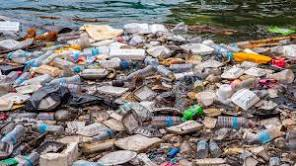

In [ ]:
from IPython.display import Image

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size=(224, 224)):
    img = keras.utils.load_img(img_path, target_size=size)
    array = keras.utils.img_to_array(img)
    array = np.expand_dims(array, axis=0)
    return array

def get_gradients(img_input, top_pred_idx):
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # 2. Preprocess the interpolated images
    interpolated_image = vgg16.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):

    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)

In [ ]:
class GradVisualizer:

    def __init__(self, positive_channel=None, negative_channel=None):
        if positive_channel is None:
            self.positive_channel = [0, 255, 0]
        else:
            self.positive_channel = positive_channel

        if negative_channel is None:
            self.negative_channel = [255, 0, 0]
        else:
            self.negative_channel = negative_channel

    def apply_polarity(self, attributions, polarity):
        if polarity == "positive":
            return np.clip(attributions, 0, 1)
        else:
            return np.clip(attributions, -1, 0)

    def apply_linear_transformation(
        self,
        attributions,
        clip_above_percentile=99.9,
        clip_below_percentile=70.0,
        lower_end=0.2,
    ):
        # 1. Get the thresholds
        m = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_above_percentile
        )
        e = self.get_thresholded_attributions(
            attributions, percentage=100 - clip_below_percentile
        )

        # 2. Transform the attributions by a linear function f(x) = a*x + b such that
        # f(m) = 1.0 and f(e) = lower_end
        transformed_attributions = (1 - lower_end) * (np.abs(attributions) - e) / (
            m - e
        ) + lower_end

        # 3. Make sure that the sign of transformed attributions is the same as original attributions
        transformed_attributions *= np.sign(attributions)

        # 4. Only keep values that are bigger than the lower_end
        transformed_attributions *= transformed_attributions >= lower_end

        # 5. Clip values and return
        transformed_attributions = np.clip(transformed_attributions, 0.0, 1.0)
        return transformed_attributions

    def get_thresholded_attributions(self, attributions, percentage):
        if percentage == 100.0:
            return np.min(attributions)

        # 1. Flatten the attributions
        flatten_attr = attributions.flatten()

        # 2. Get the sum of the attributions
        total = np.sum(flatten_attr)

        # 3. Sort the attributions from largest to smallest.
        sorted_attributions = np.sort(np.abs(flatten_attr))[::-1]

        # 4. Calculate the percentage of the total sum that each attribution
        # and the values about it contribute.
        cum_sum = 100.0 * np.cumsum(sorted_attributions) / total

        # 5. Threshold the attributions by the percentage
        indices_to_consider = np.where(cum_sum >= percentage)[0][0]

        # 6. Select the desired attributions and return
        attributions = sorted_attributions[indices_to_consider]
        return attributions

    def binarize(self, attributions, threshold=0.001):
        return attributions > threshold

    def morphological_cleanup_fn(self, attributions, structure=np.ones((4, 4))):
        closed = ndimage.grey_closing(attributions, structure=structure)
        opened = ndimage.grey_opening(closed, structure=structure)
        return opened

    def draw_outlines(
        self, attributions, percentage=90, connected_component_structure=np.ones((3, 3))
    ):
        # 1. Binarize the attributions.
        attributions = self.binarize(attributions)

        # 2. Fill the gaps
        attributions = ndimage.binary_fill_holes(attributions)

        # 3. Compute connected components
        connected_components, num_comp = ndimage.measurements.label(
            attributions, structure=connected_component_structure
        )

        # 4. Sum up the attributions for each component
        total = np.sum(attributions[connected_components > 0])
        component_sums = []
        for comp in range(1, num_comp + 1):
            mask = connected_components == comp
            component_sum = np.sum(attributions[mask])
            component_sums.append((component_sum, mask))

        # 5. Compute the percentage of top components to keep
        sorted_sums_and_masks = sorted(component_sums, key=lambda x: x[0], reverse=True)
        sorted_sums = list(zip(*sorted_sums_and_masks))[0]
        cumulative_sorted_sums = np.cumsum(sorted_sums)
        cutoff_threshold = percentage * total / 100
        cutoff_idx = np.where(cumulative_sorted_sums >= cutoff_threshold)[0][0]
        if cutoff_idx > 2:
            cutoff_idx = 2

        # 6. Set the values for the kept components
        border_mask = np.zeros_like(attributions)
        for i in range(cutoff_idx + 1):
            border_mask[sorted_sums_and_masks[i][1]] = 1

        # 7. Make the mask hollow and show only the border
        eroded_mask = ndimage.binary_erosion(border_mask, iterations=1)
        border_mask[eroded_mask] = 0

        # 8. Return the outlined mask
        return border_mask

    def process_grads(
        self,
        image,
        attributions,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
    ):
        if polarity not in ["positive", "negative"]:
            raise ValueError(

            )
        if clip_above_percentile < 0 or clip_above_percentile > 100:
            raise ValueError("clip_above_percentile must be in [0, 100]")

        if clip_below_percentile < 0 or clip_below_percentile > 100:
            raise ValueError("clip_below_percentile must be in [0, 100]")

        # 1. Apply polarity
        if polarity == "positive":
            attributions = self.apply_polarity(attributions, polarity=polarity)
            channel = self.positive_channel
        else:
            attributions = self.apply_polarity(attributions, polarity=polarity)
            attributions = np.abs(attributions)
            channel = self.negative_channel

        # 2. Take average over the channels
        attributions = np.average(attributions, axis=2)

        # 3. Apply linear transformation to the attributions
        attributions = self.apply_linear_transformation(
            attributions,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            lower_end=0.0,
        )

        # 4. Cleanup
        if morphological_cleanup:
            attributions = self.morphological_cleanup_fn(
                attributions, structure=structure
            )
        # 5. Draw the outlines
        if outlines:
            attributions = self.draw_outlines(
                attributions, percentage=outlines_component_percentage
            )

        # 6. Expand the channel axis and convert to RGB
        attributions = np.expand_dims(attributions, 2) * channel

        # 7.Superimpose on the original image
        if overlay:
            attributions = np.clip((attributions * 0.8 + image), 0, 200)
        return attributions

    def visualize(
        self,
        image,
        gradients,
        integrated_gradients,
        polarity="positive",
        clip_above_percentile=99.9,
        clip_below_percentile=0,
        morphological_cleanup=False,
        structure=np.ones((3, 3)),
        outlines=False,
        outlines_component_percentage=90,
        overlay=True,
        figsize=(15, 8),
    ):
        # 1. Make two copies of the original image
        img1 = np.copy(image)
        img2 = np.copy(image)

        # 2. Process the normal gradients
        grads_attr = self.process_grads(
            image=img1,
            attributions=gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        # 3. Process the integrated gradients
        igrads_attr = self.process_grads(
            image=img2,
            attributions=integrated_gradients,
            polarity=polarity,
            clip_above_percentile=clip_above_percentile,
            clip_below_percentile=clip_below_percentile,
            morphological_cleanup=morphological_cleanup,
            structure=structure,
            outlines=outlines,
            outlines_component_percentage=outlines_component_percentage,
            overlay=overlay,
        )

        _, ax = plt.subplots(1, 3, figsize=figsize)
        ax[0].imshow(image)
        ax[1].imshow(grads_attr.astype(np.uint8))
        ax[2].imshow(igrads_attr.astype(np.uint8))

        ax[0].set_title("Input")
        ax[1].set_title("Normal gradients")
        ax[2].set_title("Integrated gradients")
        plt.show()

In [ ]:
img = get_img_array(img_path)

In [ ]:
orig_img = np.copy(img[0]).astype(np.uint8)

In [ ]:
print(orig_img.shape)

(224, 224, 3)


In [ ]:
img_processed = tf.cast(vgg16.preprocess_input(i),dtype=tf.float32)


ValueError: could not convert string to float: 'C:\\Users\\Vidhathri B Sharma\\.keras\\datasets\\waste.jpg'

In [ ]:
preds = model.predict(img_processed)
top_pred_idx = tf.argmax(preds[0])
print("Predicted:", top_pred_idx, vgg16.decode_predictions(preds, top=1)[0])


1/1 [==============================] - 0s 473ms/step
Predicted: tf.Tensor(825, shape=(), dtype=int64) [('n04326547', 'stone_wall', 0.06961286)]


In [ ]:
grads = get_gradients(img_processed, top_pred_idx=top_pred_idx)

In [ ]:
igrads = random_baseline_integrated_gradients(
    np.copy(orig_img), top_pred_idx=top_pred_idx, num_steps=50, num_runs=2)

ValueError: operands could not be broadcast together with shapes (224,224,3) (296,166,3) 

In [ ]:
vis = GradVisualizer()
vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=99,
    clip_below_percentile=0,
)

vis.visualize(
    image=orig_img,
    gradients=grads[0].numpy(),
    integrated_gradients=igrads.numpy(),
    clip_above_percentile=95,
    clip_below_percentile=28,
    morphological_cleanup=True,
    outlines=True,
)

In [ ]:
import json
import torch
from torchvision import models, transforms
from PIL import Image as PilImage

from omnixai.data.image import Image
from omnixai.explainers.vision import IntegratedGradientImage

In [ ]:
import omnixai

ContextualVersionConflict: ignored

In [ ]:
pip install --upgrade ipython

In [ ]:
pip show ipython

Name: ipython
Version: 8.14.0
Summary: IPython: Productive Interactive Computing
Home-page: https://ipython.org
Author: The IPython Development Team
Author-email: ipython-dev@python.org
License: BSD-3-Clause
Location: /usr/local/lib/python3.10/dist-packages
Requires: backcall, decorator, jedi, matplotlib-inline, pexpect, pickleshare, prompt-toolkit, pygments, stack-data, traitlets
Required-by: cufflinks, datascience, google-colab, ipykernel, ipython-sql, ipywidgets, jupyter-console, omnixai


In [ ]:
pip install ipython==8.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.3/784.3 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: ipython
    Found existing installation: ipython 8.14.0
    Uninstalling ipython-8.14.0:
      Successfully uninstalled ipython-8.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires ipython==7.34.0, but you have ipython 8.10.0 which is incompatible.


In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [ ]:
pip install omnixai

In [ ]:
# Load the test image
img = Image(PilImage.open('/content/waste.jpg').convert('RGB'))
# Load the class names
with open('/content/imagenet_class_index.json', 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model = models.inception_v3(pretrained=True).to(device)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])
preprocess = lambda ims: torch.stack([transform(im.to_pil()) for im in ims])

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 99.7MB/s]



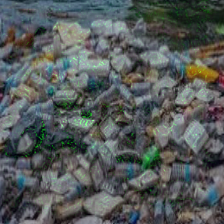
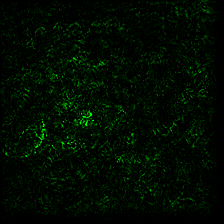

In [ ]:
explainer = IntegratedGradientImage(
    model=model,
    preprocess_function=preprocess
)
# Explain the top label
explanations = explainer.explain(img)
explanations.ipython_plot(index=0, class_names=idx2label)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

151739/151739 [==============================] - 0s 0us/step


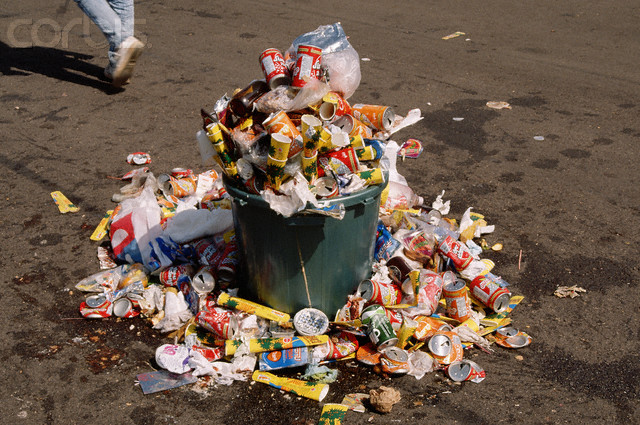

In [ ]:
model_builder = keras.applications.xception.Xception
img_size = (299, 299)
preprocess_input = keras.applications.xception.preprocess_input
decode_predictions = keras.applications.xception.decode_predictions

last_conv_layer_name = "block14_sepconv2_act"

# The local path to our target image
img_path = keras.utils.get_file(
    "garbage1.jpg", "https://theemergencestartsnow.files.wordpress.com/2015/09/3a017-garbage.jpg"
)

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))


In [ ]:
model = model_builder(weights="imagenet")

In [ ]:
model.layers[-1].activation = None

In [ ]:
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02747177', 'ashcan', 15.373316)]


In [ ]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

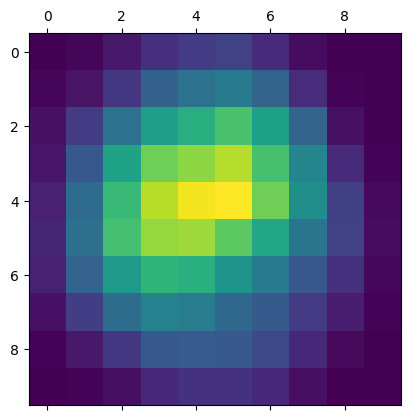

In [ ]:
# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-26-8a3df7f2985d>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



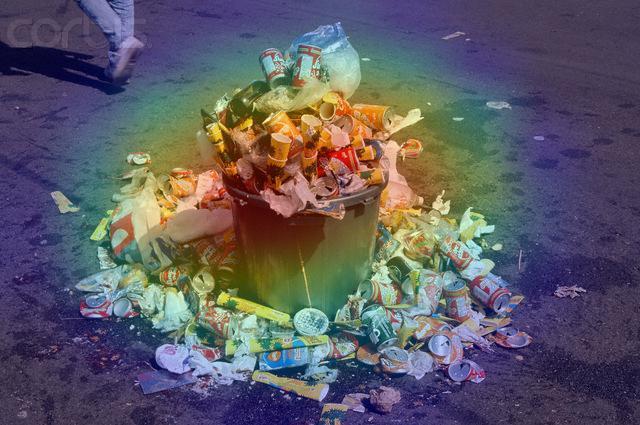

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

11015/11015 [==============================] - 0s 1us/step


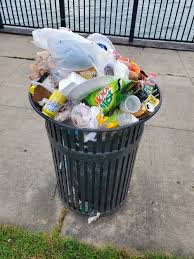

In [ ]:
model_builder = keras.applications.vgg16.VGG16
img_size = (224, 224)
preprocess_input = keras.applications.vgg16.preprocess_input
decode_predictions = keras.applications.vgg16.decode_predictions

last_conv_layer_name = "block5_conv3"

# The local path to our target image
img_path = keras.utils.get_file(
    "dustbin1.jpg", "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQP4zWsMMlM_DFlHDQX4jFaZGuSLhshJI4r0Q&usqp=CAU"
)

display(Image(img_path))

In [ ]:
def get_img_array(img_path, size):
    # `img` is a PIL image of size 299x299
    img = keras.utils.load_img(img_path, target_size=size)
    # `array` is a float32 Numpy array of shape (299, 299, 3)
    array = keras.utils.img_to_array(img)
    # We add a dimension to transform our array into a "batch"
    # of size (1, 299, 299, 3)
    array = np.expand_dims(array, axis=0)
    return array


def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = keras.models.Model(
        model.inputs, [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
img_array = preprocess_input(get_img_array(img_path, size=img_size))


In [ ]:
model = model_builder(weights="imagenet")

In [ ]:
model.layers[-1].activation = None

In [ ]:
preds = model.predict(img_array)
print("Predicted:", decode_predictions(preds, top=1)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n02747177', 'ashcan', 16.119461)]


In [ ]:
heatmap = make_gradcam_heatmap(img_array, model, last_conv_layer_name)

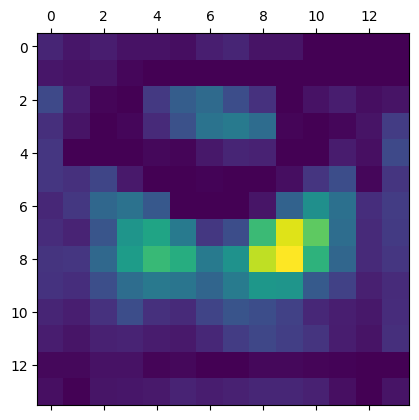

In [ ]:
# Display heatmap
plt.matshow(heatmap)
plt.show()

<ipython-input-63-8a3df7f2985d>:10: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



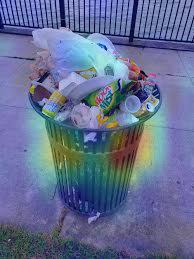

In [ ]:
def save_and_display_gradcam(img_path, heatmap, cam_path="cam.jpg", alpha=0.4):
    # Load the original image
    img = keras.utils.load_img(img_path)
    img = keras.utils.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.utils.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.utils.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.utils.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)


In [ ]:
!jupyter nbconvert project_\(1\)_\(1\)_\(1\)\ \(1\).ipynb --to html

[NbConvertApp] Converting notebook project_(1)_(1)_(1) (1).ipynb to html
/usr/local/lib/python3.10/dist-packages/nbconvert/filters/widgetsdatatypefilter.py:71: UserWarning: Your element with mimetype(s) dict_keys(['application/vnd.colab-display-data+json']) is not able to be represented.
  warn(
[NbConvertApp] Writing 2609060 bytes to project_(1)_(1)_(1) (1).html
